## Predicting whether mushroom is Edible (good) or poisonous based on various features of mushrooms on "mushrooms.csv" dataset using Machine Learning algorithms.
<b> In this article, we will use the same dataset "mushrooms.csv", which we have used in previous in AdaBoost Algorithm, Gradient Boosting Classifier and XGBoost. By using the same dataset, we can compare the CatBoost classifier with AdaBoost Algorithm, Gradient Boosting Classifier and XGBoost. Here we are going to predict whether mushroom is Edible (good) or poisonous based on various features of mushrooms on "mushrooms.csv" dataset using Machine Learning algorithms. The algorithms included CatBoost Classifier.


## Step - 1 : Business Problem Understanding
<b> Develop a predictive model to identify whether mushroom is Edible (good) or poisonous based on various features of mushrooms.
    
<b> A general guideline for features, people should look out for when picking mushrooms.
    
<b> In this project we will dive into mushroom classification problem which is represented by a tabular dataset that contains 23 features and 8124 observations, labeled as edible or poisonous mushroom. The goal is to classify mushrooms as either edible or poisonous.

    

<b> Before we implement the CatBoost, we need to install the the catboost library.

- <b> Command: pip install catboost

In [1]:
# Installing catboost using jupiter notebook.
!pip install catboost

<b> importing all the necessary libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

<b> In the above, i have imported all the necessary libraries.

## Step - 2 : Data Understanding
### 2.1 Data Collection
<b>Load the dataset by using read_csv() to read the dataset and save it to the 'df' variable and take a look at the first 5 lines using the head() method.

In [3]:
# Load the dataset.
df = pd.read_csv("mushrooms.csv")

# Display the first 5 lines using the head() method.
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### 2.2 Data Understanding


<b> predict whether mushroom is Edible (good) or poisonous based on various features of mushrooms on mushrooms.csv dataset. 
    
A mushroom or toadstool is the fleshy, spore-bearing fruiting body of a fungus, typically produced above ground, on soil, or on its food source (from wikipedia). Contains variables:
    
1. class: Edible or poisonous, i.e. e = Edible, p = poisonous
2. cap-shape: The shape of the expanded, upper part of the mushroom, i.e. bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
3. cap-surface: The structure of the upper part of the mushroom, i.e. fibrous=f,grooves=g,scaly=y,smooth=s
4. cap-color: The color of the surface of the upper part of the mushroom, i.e. brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
5. bruises: Indicates of there are bruises on the mushroom, i.e. bruises=t,no=f
6. odor: The smell the mushroom omits, i.e. almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
7. gill-attachment: The way the gill is growing on the mushroom, i.e. attached=a,descending=d,free=f,notched=n
8. gill-spacing: The gap of space between each gill, i.e. close=c,crowded=w,distant=d
9. gill-size: The size of the gills, i.e. broad=b,narrow=n
10. gill-color: 	The color of the gills, i.e. black=k,brown=n,buff=b,chocolate=h,gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
11. stalk-shape: The Stalk`s form, i.e. enlarging=e,tapering=t
12. stalk-root: The root of the mushroom, i.e. bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
13. stalk-surface-above-ring: The surface of the stalk above the mushrooms ring, i.e. fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-surface-below-ring: The surface of the stalk below the mushrooms ring, i.e. fibrous=f,scaly=y,silky=k,smooth=s
15. stalk-color-above-ring: The color of the stalk above the mushrooms ring, i.e. brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p, red=e, white=w, yellow=y
16. stalk-color-below-ring: The color of the stalk below the mushrooms ring, i.e. brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
17. veil-type: The type of the mushroom`s veil, i.e. partial=p,universal=u
18. veil-color: The color of the mushroom`s veil, i.e. brown=n,orange=o,white=w,yellow=y
19. ring-number: The amount fo rings the mushroom, i.e. hasnone=n,one=o,tw, i.e. o=t
20. ring-type: The type of the mushroom`s ring, i.e. cobwebby=c,evanescent=e,flaring=f,large=l, none=n, pendant=p, sheathing=s, zone=z
21. spore-print-color: The color of the mushromm`s spore, i.e. black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
22. population: The population spread, i.e. abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
23. habitat: The mushroom`s environment, i.e. grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
    
    

<b> Let’s have a look at data dimensionality.

In [4]:
df.shape

(8124, 23)

<b> From the output, we can see that the table contains 8124 rows and 23 columns.
    
    
<b> We can use the info() method to output some general information about the dataframe :

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

<b> object is the data type of all features. We see 23 features are categorical. With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 8124 observations, the same number of rows we saw before with shape.
   

## Step - 3 : Data Preprocessing
### 3.1 Exploratory Data Analysis (EDA)


<b> For categorical (type object) features we can use the value_counts method. Let's have a look at the distribution of all the features:
    
<b> Checking the unique values/categories from the target variable (class). 

In [6]:
df["class"].unique()

array(['p', 'e'], dtype=object)

<b> As we can see, there are 2 unique values in the target variable (class), i.e. 'p' and 'e'.

<b> Now use the value_counts method on target variable (class).

In [7]:
df["class"].value_counts()

e    4208
p    3916
Name: class, dtype: int64

<b> e=4208 and p=3916 Out-of 8124 records.

### 3.2 Data Visualization :
<b> We will make a detailed plot for our target ("class") to get a clear idea of it's distribution:

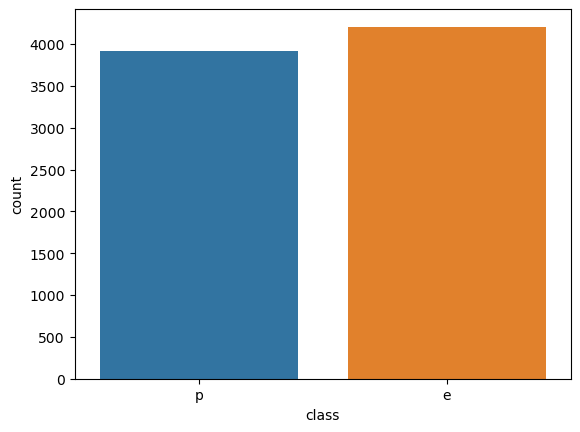

In [8]:
# Draw the countplot with class Vs count.
# Pass data=df.
# Pass x="class"
sns.countplot(x="class", data=df)

# Display all figures.
plt.show()

<b> The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types): count, mean, standard deviation, min, max, median, 0.25 and 0.75 quartiles.

In [9]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


### 3.3 Data Cleaning
<b> Checking the Empty cells / Missing values :
- The isnull().sum() method returns the total number of missing values (count) present in the each column.

In [11]:
# Check the missing values records.
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<b> In the above, we can see that there is no missing values.

### 3.4 Encoding
<b> In this data set all the variables are categorical variables. We have to convert these variables into dummy/indicator variables, here we are doing it using pandas get_dummies:
    
<b> Here we are applying encoding on independent variables and dependent variables are seperatelly.
    

In [12]:
# Apply the Encoding on independent variables by using LabelEncoder() on "df" object.

# drop the target variable and store it as "input_data" object.
input_data = df.drop("class", axis=1)

# Apply the Encoding by using get_dummies() on "df1" object.
df1 = pd.get_dummies(input_data, drop_first=True)

# print the "df1" object.
df1

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


<b> Now applying encoding on dependent variable.

In [13]:
# Apply the Encoding by using get_dummies() on "df["class"]".
df2 = pd.get_dummies(df["class"], drop_first=True)

# print the "df2" object.
df2

,p
0,1
1,0
2,0
3,1
4,0
...,...
8119,0
8120,0
8121,0
8122,1


### 3.5 Train/Test Split
<b> Creating independent variables i.e. df1 as "x" variable and dependent variable "species" as "y" variable.

In [14]:
# Create independent variables as "x" and dependent variable as "y" object.

# Create the independent variable as x.
x = df1

# target variable to predict/ dependant variable
y = df2                                                       

In [15]:
# Print the x variable.
x

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [16]:
# Print the y variable.
y

,p
0,1
1,0
2,0
3,1
4,0
...,...
8119,0
8120,0
8121,0
8122,1


<b> In the above, I have created x variable with 22 independent (input) variables and y variable with 1 dependent (output) variable.

In [17]:
# import train_test_split from scikit-learn.
from sklearn.model_selection import train_test_split

# splitiing data for training and testing
# 80% training, 20% testing and random_state=101
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In the first line of the above code, we have imported the train_test_split function from the sklearn library.


In the second line, we have used four variables, which are :

   - x_train: It is used to represent features for the training data
   - x_test: It is used to represent features for testing data
   - y_train: It is used to represent dependent variables for training data
   - y_test: It is used to represent independent variable for testing data
   
   
In the train_test_split() function, we have passed four parameters. In which first two are for arrays of data, and test_size is for specifying the size of the test set which tells the dividing ratio of training and testing sets. The last parameter, random_state, is used to set a seed for a random generator so that you always get the same result.

<b> View the dimensions of x_train, x_test, y_train, y_test

In [18]:
x_train.shape, x_test.shape

((6499, 95), (1625, 95))

In [19]:
y_train.shape, y_test.shape

((6499, 1), (1625, 1))

## Step - 4 : CatBoost Classifier Modelling and Evaluation with default Prameters:
<b> CatBoost Classifier (Baseline Model)

In [20]:
# Create a result object which contains model_name, accuracy, cross_val_score, recall and F1_score
Results = pd.DataFrame({'Model': [],'Accuracy Score': [], 'Cross_val_score':[], 'Recall':[], 'F1score':[]})

In [21]:
# Modelling
# import the CatBoostClassifier from catboost library.
from catboost import CatBoostClassifier

# Create the classifier object (model) as "cat_default".
cat_default = CatBoostClassifier()

# Train the model using training sets
cat_default.fit(x_train, y_train)

# Prediction
# Predict on the train data set.
train_predictions = cat_default.predict(x_train)

# Predict on the test data set.
test_predictions = cat_default.predict(x_test)

# Evaluation
# import the accuracy_score, recall_score and f1_scoreclass from sklearn.metrics library
from sklearn.metrics import accuracy_score, recall_score, f1_score

# import the cross_val_score class from sklearn.model_selection library
from sklearn.model_selection import cross_val_score

res = pd.DataFrame({"Model":['CatBoostClassifier'], "Accuracy Score": [accuracy_score(test_predictions, y_test)],
                   "Cross_val_score": [cross_val_score(cat_default, x, y, cv=5).mean()], 
                    "Recall": [recall_score(y_test, test_predictions)], "F1score": [f1_score(y_test, test_predictions)]})
Results = Results.append(res)

Learning rate set to 0.02291
0:	learn: 0.6384629	total: 152ms	remaining: 2m 32s
1:	learn: 0.5996161	total: 158ms	remaining: 1m 18s
2:	learn: 0.5354377	total: 165ms	remaining: 54.9s
3:	learn: 0.4811995	total: 175ms	remaining: 43.7s
4:	learn: 0.4410887	total: 182ms	remaining: 36.3s
5:	learn: 0.3924395	total: 190ms	remaining: 31.4s
6:	learn: 0.3666394	total: 197ms	remaining: 27.9s
7:	learn: 0.3295002	total: 204ms	remaining: 25.3s
8:	learn: 0.2997259	total: 215ms	remaining: 23.7s
9:	learn: 0.2739375	total: 227ms	remaining: 22.5s
10:	learn: 0.2553507	total: 238ms	remaining: 21.4s
11:	learn: 0.2309767	total: 245ms	remaining: 20.2s
12:	learn: 0.2166047	total: 256ms	remaining: 19.4s
13:	learn: 0.1966019	total: 263ms	remaining: 18.5s
14:	learn: 0.1825473	total: 272ms	remaining: 17.9s
15:	learn: 0.1699136	total: 280ms	remaining: 17.2s
16:	learn: 0.1552260	total: 287ms	remaining: 16.6s
17:	learn: 0.1420574	total: 294ms	remaining: 16.1s
18:	learn: 0.1265681	total: 301ms	remaining: 15.6s
19:	learn:

166:	learn: 0.0039115	total: 1.69s	remaining: 8.44s
167:	learn: 0.0038584	total: 1.7s	remaining: 8.43s
168:	learn: 0.0037886	total: 1.72s	remaining: 8.43s
169:	learn: 0.0037586	total: 1.73s	remaining: 8.45s
170:	learn: 0.0037586	total: 1.74s	remaining: 8.44s
171:	learn: 0.0037586	total: 1.75s	remaining: 8.41s
172:	learn: 0.0037434	total: 1.76s	remaining: 8.41s
173:	learn: 0.0037434	total: 1.77s	remaining: 8.39s
174:	learn: 0.0036935	total: 1.78s	remaining: 8.38s
175:	learn: 0.0036882	total: 1.79s	remaining: 8.37s
176:	learn: 0.0036766	total: 1.81s	remaining: 8.42s
177:	learn: 0.0036580	total: 1.82s	remaining: 8.41s
178:	learn: 0.0036458	total: 1.83s	remaining: 8.39s
179:	learn: 0.0036346	total: 1.84s	remaining: 8.37s
180:	learn: 0.0035613	total: 1.84s	remaining: 8.34s
181:	learn: 0.0035290	total: 1.85s	remaining: 8.34s
182:	learn: 0.0035138	total: 1.86s	remaining: 8.32s
183:	learn: 0.0035138	total: 1.87s	remaining: 8.3s
184:	learn: 0.0034949	total: 1.88s	remaining: 8.28s
185:	learn: 0.

353:	learn: 0.0015490	total: 3.65s	remaining: 6.66s
354:	learn: 0.0015446	total: 3.66s	remaining: 6.65s
355:	learn: 0.0015446	total: 3.67s	remaining: 6.63s
356:	learn: 0.0015446	total: 3.67s	remaining: 6.61s
357:	learn: 0.0015446	total: 3.71s	remaining: 6.64s
358:	learn: 0.0015446	total: 3.72s	remaining: 6.64s
359:	learn: 0.0015446	total: 3.73s	remaining: 6.62s
360:	learn: 0.0015446	total: 3.73s	remaining: 6.61s
361:	learn: 0.0015446	total: 3.74s	remaining: 6.59s
362:	learn: 0.0015446	total: 3.74s	remaining: 6.57s
363:	learn: 0.0015446	total: 3.75s	remaining: 6.55s
364:	learn: 0.0015446	total: 3.76s	remaining: 6.54s
365:	learn: 0.0015446	total: 3.76s	remaining: 6.52s
366:	learn: 0.0015446	total: 3.77s	remaining: 6.5s
367:	learn: 0.0015446	total: 3.78s	remaining: 6.49s
368:	learn: 0.0015446	total: 3.78s	remaining: 6.47s
369:	learn: 0.0015402	total: 3.79s	remaining: 6.45s
370:	learn: 0.0015402	total: 3.8s	remaining: 6.44s
371:	learn: 0.0015402	total: 3.81s	remaining: 6.42s
372:	learn: 0.

538:	learn: 0.0013590	total: 4.89s	remaining: 4.18s
539:	learn: 0.0013590	total: 4.9s	remaining: 4.17s
540:	learn: 0.0013590	total: 4.91s	remaining: 4.16s
541:	learn: 0.0013589	total: 4.91s	remaining: 4.15s
542:	learn: 0.0013589	total: 4.92s	remaining: 4.14s
543:	learn: 0.0013589	total: 4.93s	remaining: 4.13s
544:	learn: 0.0013589	total: 4.93s	remaining: 4.12s
545:	learn: 0.0013589	total: 4.94s	remaining: 4.11s
546:	learn: 0.0013589	total: 4.95s	remaining: 4.1s
547:	learn: 0.0013588	total: 4.95s	remaining: 4.09s
548:	learn: 0.0013588	total: 4.96s	remaining: 4.08s
549:	learn: 0.0013588	total: 4.97s	remaining: 4.06s
550:	learn: 0.0013587	total: 4.97s	remaining: 4.05s
551:	learn: 0.0013587	total: 4.98s	remaining: 4.04s
552:	learn: 0.0013587	total: 4.99s	remaining: 4.03s
553:	learn: 0.0013586	total: 5s	remaining: 4.02s
554:	learn: 0.0013586	total: 5s	remaining: 4.01s
555:	learn: 0.0013586	total: 5.01s	remaining: 4s
556:	learn: 0.0013586	total: 5.01s	remaining: 3.99s
557:	learn: 0.0013586	t

720:	learn: 0.0013044	total: 6.11s	remaining: 2.36s
721:	learn: 0.0013044	total: 6.12s	remaining: 2.35s
722:	learn: 0.0013044	total: 6.13s	remaining: 2.35s
723:	learn: 0.0013044	total: 6.14s	remaining: 2.34s
724:	learn: 0.0013043	total: 6.14s	remaining: 2.33s
725:	learn: 0.0013043	total: 6.15s	remaining: 2.32s
726:	learn: 0.0013042	total: 6.16s	remaining: 2.31s
727:	learn: 0.0013042	total: 6.16s	remaining: 2.3s
728:	learn: 0.0013042	total: 6.17s	remaining: 2.29s
729:	learn: 0.0013042	total: 6.17s	remaining: 2.28s
730:	learn: 0.0013042	total: 6.18s	remaining: 2.27s
731:	learn: 0.0013042	total: 6.19s	remaining: 2.26s
732:	learn: 0.0013042	total: 6.19s	remaining: 2.25s
733:	learn: 0.0013042	total: 6.2s	remaining: 2.25s
734:	learn: 0.0013042	total: 6.2s	remaining: 2.24s
735:	learn: 0.0013042	total: 6.21s	remaining: 2.23s
736:	learn: 0.0013042	total: 6.22s	remaining: 2.22s
737:	learn: 0.0013042	total: 6.23s	remaining: 2.21s
738:	learn: 0.0013041	total: 6.23s	remaining: 2.2s
739:	learn: 0.00

902:	learn: 0.0012547	total: 7.14s	remaining: 767ms
903:	learn: 0.0012547	total: 7.15s	remaining: 759ms
904:	learn: 0.0012547	total: 7.15s	remaining: 751ms
905:	learn: 0.0012435	total: 7.16s	remaining: 743ms
906:	learn: 0.0012435	total: 7.17s	remaining: 735ms
907:	learn: 0.0012435	total: 7.17s	remaining: 727ms
908:	learn: 0.0012435	total: 7.18s	remaining: 719ms
909:	learn: 0.0012435	total: 7.18s	remaining: 711ms
910:	learn: 0.0012435	total: 7.19s	remaining: 702ms
911:	learn: 0.0012435	total: 7.19s	remaining: 694ms
912:	learn: 0.0012435	total: 7.2s	remaining: 686ms
913:	learn: 0.0012435	total: 7.21s	remaining: 678ms
914:	learn: 0.0012435	total: 7.21s	remaining: 670ms
915:	learn: 0.0012435	total: 7.22s	remaining: 662ms
916:	learn: 0.0012435	total: 7.22s	remaining: 654ms
917:	learn: 0.0012435	total: 7.23s	remaining: 646ms
918:	learn: 0.0012435	total: 7.24s	remaining: 638ms
919:	learn: 0.0012435	total: 7.24s	remaining: 630ms
920:	learn: 0.0012435	total: 7.25s	remaining: 622ms
921:	learn: 0

82:	learn: 0.0066635	total: 618ms	remaining: 6.83s
83:	learn: 0.0065550	total: 625ms	remaining: 6.82s
84:	learn: 0.0064626	total: 633ms	remaining: 6.81s
85:	learn: 0.0064093	total: 642ms	remaining: 6.82s
86:	learn: 0.0063492	total: 649ms	remaining: 6.81s
87:	learn: 0.0062986	total: 658ms	remaining: 6.82s
88:	learn: 0.0062737	total: 665ms	remaining: 6.8s
89:	learn: 0.0061689	total: 673ms	remaining: 6.8s
90:	learn: 0.0061690	total: 679ms	remaining: 6.78s
91:	learn: 0.0061256	total: 686ms	remaining: 6.77s
92:	learn: 0.0060155	total: 702ms	remaining: 6.85s
93:	learn: 0.0058582	total: 710ms	remaining: 6.84s
94:	learn: 0.0058065	total: 717ms	remaining: 6.83s
95:	learn: 0.0055841	total: 725ms	remaining: 6.82s
96:	learn: 0.0054074	total: 732ms	remaining: 6.81s
97:	learn: 0.0052285	total: 740ms	remaining: 6.81s
98:	learn: 0.0051949	total: 747ms	remaining: 6.79s
99:	learn: 0.0051853	total: 753ms	remaining: 6.78s
100:	learn: 0.0050921	total: 760ms	remaining: 6.76s
101:	learn: 0.0049757	total: 767

245:	learn: 0.0013812	total: 1.87s	remaining: 5.74s
246:	learn: 0.0013712	total: 1.88s	remaining: 5.73s
247:	learn: 0.0013596	total: 1.89s	remaining: 5.72s
248:	learn: 0.0013596	total: 1.89s	remaining: 5.71s
249:	learn: 0.0013448	total: 1.9s	remaining: 5.7s
250:	learn: 0.0013375	total: 1.91s	remaining: 5.69s
251:	learn: 0.0013271	total: 1.91s	remaining: 5.68s
252:	learn: 0.0013271	total: 1.92s	remaining: 5.67s
253:	learn: 0.0013198	total: 1.93s	remaining: 5.65s
254:	learn: 0.0013070	total: 1.93s	remaining: 5.64s
255:	learn: 0.0012940	total: 1.94s	remaining: 5.63s
256:	learn: 0.0012940	total: 1.94s	remaining: 5.62s
257:	learn: 0.0012856	total: 1.95s	remaining: 5.61s
258:	learn: 0.0012836	total: 1.96s	remaining: 5.6s
259:	learn: 0.0012575	total: 1.96s	remaining: 5.59s
260:	learn: 0.0012507	total: 1.97s	remaining: 5.58s
261:	learn: 0.0012508	total: 1.98s	remaining: 5.57s
262:	learn: 0.0012508	total: 1.98s	remaining: 5.55s
263:	learn: 0.0012427	total: 1.99s	remaining: 5.54s
264:	learn: 0.0

415:	learn: 0.0008974	total: 3.33s	remaining: 4.68s
416:	learn: 0.0008974	total: 3.34s	remaining: 4.67s
417:	learn: 0.0008974	total: 3.37s	remaining: 4.69s
418:	learn: 0.0008964	total: 3.38s	remaining: 4.68s
419:	learn: 0.0008964	total: 3.38s	remaining: 4.67s
420:	learn: 0.0008964	total: 3.4s	remaining: 4.68s
421:	learn: 0.0008964	total: 3.41s	remaining: 4.67s
422:	learn: 0.0008964	total: 3.42s	remaining: 4.66s
423:	learn: 0.0008964	total: 3.43s	remaining: 4.66s
424:	learn: 0.0008964	total: 3.44s	remaining: 4.65s
425:	learn: 0.0008964	total: 3.45s	remaining: 4.64s
426:	learn: 0.0008964	total: 3.46s	remaining: 4.64s
427:	learn: 0.0008964	total: 3.47s	remaining: 4.63s
428:	learn: 0.0008964	total: 3.48s	remaining: 4.63s
429:	learn: 0.0008963	total: 3.49s	remaining: 4.63s
430:	learn: 0.0008963	total: 3.5s	remaining: 4.62s
431:	learn: 0.0008963	total: 3.51s	remaining: 4.62s
432:	learn: 0.0008963	total: 3.53s	remaining: 4.62s
433:	learn: 0.0008963	total: 3.54s	remaining: 4.61s
434:	learn: 0.

591:	learn: 0.0008693	total: 4.78s	remaining: 3.29s
592:	learn: 0.0008693	total: 4.78s	remaining: 3.28s
593:	learn: 0.0008693	total: 4.79s	remaining: 3.27s
594:	learn: 0.0008693	total: 4.8s	remaining: 3.26s
595:	learn: 0.0008693	total: 4.8s	remaining: 3.26s
596:	learn: 0.0008693	total: 4.81s	remaining: 3.25s
597:	learn: 0.0008693	total: 4.82s	remaining: 3.24s
598:	learn: 0.0008693	total: 4.82s	remaining: 3.23s
599:	learn: 0.0008693	total: 4.83s	remaining: 3.22s
600:	learn: 0.0008693	total: 4.83s	remaining: 3.21s
601:	learn: 0.0008693	total: 4.84s	remaining: 3.2s
602:	learn: 0.0008693	total: 4.85s	remaining: 3.19s
603:	learn: 0.0008693	total: 4.85s	remaining: 3.18s
604:	learn: 0.0008693	total: 4.86s	remaining: 3.17s
605:	learn: 0.0008693	total: 4.87s	remaining: 3.16s
606:	learn: 0.0008693	total: 4.87s	remaining: 3.15s
607:	learn: 0.0008693	total: 4.88s	remaining: 3.14s
608:	learn: 0.0008693	total: 4.88s	remaining: 3.13s
609:	learn: 0.0008693	total: 4.89s	remaining: 3.13s
610:	learn: 0.0

760:	learn: 0.0008693	total: 6.01s	remaining: 1.89s
761:	learn: 0.0008693	total: 6.02s	remaining: 1.88s
762:	learn: 0.0008693	total: 6.03s	remaining: 1.87s
763:	learn: 0.0008693	total: 6.04s	remaining: 1.86s
764:	learn: 0.0008693	total: 6.04s	remaining: 1.86s
765:	learn: 0.0008693	total: 6.05s	remaining: 1.85s
766:	learn: 0.0008693	total: 6.06s	remaining: 1.84s
767:	learn: 0.0008693	total: 6.06s	remaining: 1.83s
768:	learn: 0.0008693	total: 6.07s	remaining: 1.82s
769:	learn: 0.0008693	total: 6.08s	remaining: 1.81s
770:	learn: 0.0008693	total: 6.08s	remaining: 1.81s
771:	learn: 0.0008693	total: 6.09s	remaining: 1.8s
772:	learn: 0.0008693	total: 6.09s	remaining: 1.79s
773:	learn: 0.0008693	total: 6.1s	remaining: 1.78s
774:	learn: 0.0008693	total: 6.1s	remaining: 1.77s
775:	learn: 0.0008693	total: 6.11s	remaining: 1.76s
776:	learn: 0.0008693	total: 6.12s	remaining: 1.75s
777:	learn: 0.0008693	total: 6.12s	remaining: 1.75s
778:	learn: 0.0008693	total: 6.13s	remaining: 1.74s
779:	learn: 0.0

923:	learn: 0.0008693	total: 7.03s	remaining: 578ms
924:	learn: 0.0008693	total: 7.03s	remaining: 570ms
925:	learn: 0.0008693	total: 7.04s	remaining: 563ms
926:	learn: 0.0008693	total: 7.05s	remaining: 555ms
927:	learn: 0.0008693	total: 7.05s	remaining: 547ms
928:	learn: 0.0008693	total: 7.06s	remaining: 540ms
929:	learn: 0.0008693	total: 7.07s	remaining: 532ms
930:	learn: 0.0008693	total: 7.08s	remaining: 524ms
931:	learn: 0.0008693	total: 7.08s	remaining: 517ms
932:	learn: 0.0008693	total: 7.09s	remaining: 509ms
933:	learn: 0.0008693	total: 7.09s	remaining: 501ms
934:	learn: 0.0008693	total: 7.1s	remaining: 494ms
935:	learn: 0.0008693	total: 7.11s	remaining: 486ms
936:	learn: 0.0008693	total: 7.12s	remaining: 478ms
937:	learn: 0.0008693	total: 7.12s	remaining: 471ms
938:	learn: 0.0008693	total: 7.13s	remaining: 463ms
939:	learn: 0.0008693	total: 7.13s	remaining: 455ms
940:	learn: 0.0008693	total: 7.14s	remaining: 447ms
941:	learn: 0.0008693	total: 7.14s	remaining: 440ms
942:	learn: 0

99:	learn: 0.0075818	total: 650ms	remaining: 5.85s
100:	learn: 0.0075603	total: 657ms	remaining: 5.85s
101:	learn: 0.0075467	total: 665ms	remaining: 5.85s
102:	learn: 0.0074198	total: 673ms	remaining: 5.86s
103:	learn: 0.0073970	total: 679ms	remaining: 5.85s
104:	learn: 0.0073698	total: 685ms	remaining: 5.84s
105:	learn: 0.0073526	total: 691ms	remaining: 5.83s
106:	learn: 0.0072137	total: 697ms	remaining: 5.82s
107:	learn: 0.0071665	total: 703ms	remaining: 5.8s
108:	learn: 0.0071665	total: 706ms	remaining: 5.77s
109:	learn: 0.0071461	total: 711ms	remaining: 5.76s
110:	learn: 0.0070202	total: 717ms	remaining: 5.74s
111:	learn: 0.0068486	total: 723ms	remaining: 5.73s
112:	learn: 0.0068047	total: 728ms	remaining: 5.72s
113:	learn: 0.0066894	total: 734ms	remaining: 5.71s
114:	learn: 0.0066801	total: 739ms	remaining: 5.69s
115:	learn: 0.0065564	total: 745ms	remaining: 5.67s
116:	learn: 0.0064550	total: 750ms	remaining: 5.66s
117:	learn: 0.0063520	total: 756ms	remaining: 5.65s
118:	learn: 0.

259:	learn: 0.0018855	total: 1.88s	remaining: 5.34s
260:	learn: 0.0018795	total: 1.88s	remaining: 5.33s
261:	learn: 0.0018707	total: 1.89s	remaining: 5.33s
262:	learn: 0.0018659	total: 1.9s	remaining: 5.32s
263:	learn: 0.0018580	total: 1.91s	remaining: 5.32s
264:	learn: 0.0018456	total: 1.91s	remaining: 5.31s
265:	learn: 0.0018456	total: 1.92s	remaining: 5.3s
266:	learn: 0.0018182	total: 1.93s	remaining: 5.29s
267:	learn: 0.0018109	total: 1.93s	remaining: 5.28s
268:	learn: 0.0018000	total: 1.94s	remaining: 5.28s
269:	learn: 0.0018000	total: 1.95s	remaining: 5.27s
270:	learn: 0.0018000	total: 1.95s	remaining: 5.26s
271:	learn: 0.0018000	total: 1.96s	remaining: 5.25s
272:	learn: 0.0017919	total: 1.97s	remaining: 5.24s
273:	learn: 0.0017781	total: 1.98s	remaining: 5.24s
274:	learn: 0.0017711	total: 1.99s	remaining: 5.24s
275:	learn: 0.0017711	total: 2s	remaining: 5.26s
276:	learn: 0.0017711	total: 2.01s	remaining: 5.25s
277:	learn: 0.0017711	total: 2.02s	remaining: 5.24s
278:	learn: 0.001

428:	learn: 0.0012035	total: 3.11s	remaining: 4.13s
429:	learn: 0.0012035	total: 3.11s	remaining: 4.13s
430:	learn: 0.0012035	total: 3.12s	remaining: 4.12s
431:	learn: 0.0012035	total: 3.13s	remaining: 4.11s
432:	learn: 0.0012035	total: 3.13s	remaining: 4.1s
433:	learn: 0.0012035	total: 3.14s	remaining: 4.09s
434:	learn: 0.0012035	total: 3.15s	remaining: 4.08s
435:	learn: 0.0012034	total: 3.15s	remaining: 4.08s
436:	learn: 0.0012034	total: 3.16s	remaining: 4.07s
437:	learn: 0.0012034	total: 3.17s	remaining: 4.06s
438:	learn: 0.0011988	total: 3.17s	remaining: 4.05s
439:	learn: 0.0011988	total: 3.18s	remaining: 4.05s
440:	learn: 0.0011988	total: 3.19s	remaining: 4.04s
441:	learn: 0.0011988	total: 3.19s	remaining: 4.03s
442:	learn: 0.0011988	total: 3.2s	remaining: 4.02s
443:	learn: 0.0011988	total: 3.2s	remaining: 4.01s
444:	learn: 0.0011988	total: 3.21s	remaining: 4s
445:	learn: 0.0011988	total: 3.22s	remaining: 4s
446:	learn: 0.0011988	total: 3.23s	remaining: 3.99s
447:	learn: 0.0011988

619:	learn: 0.0011952	total: 4.36s	remaining: 2.67s
620:	learn: 0.0011952	total: 4.37s	remaining: 2.67s
621:	learn: 0.0011952	total: 4.38s	remaining: 2.66s
622:	learn: 0.0011952	total: 4.38s	remaining: 2.65s
623:	learn: 0.0011952	total: 4.39s	remaining: 2.65s
624:	learn: 0.0011952	total: 4.39s	remaining: 2.64s
625:	learn: 0.0011952	total: 4.4s	remaining: 2.63s
626:	learn: 0.0011952	total: 4.41s	remaining: 2.62s
627:	learn: 0.0011952	total: 4.41s	remaining: 2.61s
628:	learn: 0.0011952	total: 4.42s	remaining: 2.61s
629:	learn: 0.0011952	total: 4.42s	remaining: 2.6s
630:	learn: 0.0011952	total: 4.43s	remaining: 2.59s
631:	learn: 0.0011952	total: 4.44s	remaining: 2.58s
632:	learn: 0.0011952	total: 4.44s	remaining: 2.58s
633:	learn: 0.0011952	total: 4.45s	remaining: 2.57s
634:	learn: 0.0011952	total: 4.46s	remaining: 2.56s
635:	learn: 0.0011952	total: 4.46s	remaining: 2.55s
636:	learn: 0.0011952	total: 4.47s	remaining: 2.55s
637:	learn: 0.0011952	total: 4.47s	remaining: 2.54s
638:	learn: 0.

783:	learn: 0.0011952	total: 5.64s	remaining: 1.55s
784:	learn: 0.0011952	total: 5.66s	remaining: 1.55s
785:	learn: 0.0011952	total: 5.67s	remaining: 1.54s
786:	learn: 0.0011952	total: 5.68s	remaining: 1.54s
787:	learn: 0.0011952	total: 5.69s	remaining: 1.53s
788:	learn: 0.0011952	total: 5.7s	remaining: 1.52s
789:	learn: 0.0011952	total: 5.7s	remaining: 1.52s
790:	learn: 0.0011952	total: 5.71s	remaining: 1.51s
791:	learn: 0.0011952	total: 5.71s	remaining: 1.5s
792:	learn: 0.0011952	total: 5.72s	remaining: 1.49s
793:	learn: 0.0011952	total: 5.73s	remaining: 1.49s
794:	learn: 0.0011952	total: 5.74s	remaining: 1.48s
795:	learn: 0.0011952	total: 5.74s	remaining: 1.47s
796:	learn: 0.0011952	total: 5.75s	remaining: 1.47s
797:	learn: 0.0011952	total: 5.76s	remaining: 1.46s
798:	learn: 0.0011952	total: 5.76s	remaining: 1.45s
799:	learn: 0.0011952	total: 5.77s	remaining: 1.44s
800:	learn: 0.0011952	total: 5.78s	remaining: 1.44s
801:	learn: 0.0011952	total: 5.78s	remaining: 1.43s
802:	learn: 0.0

951:	learn: 0.0011951	total: 7.31s	remaining: 368ms
952:	learn: 0.0011951	total: 7.32s	remaining: 361ms
953:	learn: 0.0011951	total: 7.33s	remaining: 353ms
954:	learn: 0.0011951	total: 7.38s	remaining: 348ms
955:	learn: 0.0011951	total: 7.4s	remaining: 340ms
956:	learn: 0.0011951	total: 7.43s	remaining: 334ms
957:	learn: 0.0011951	total: 7.44s	remaining: 326ms
958:	learn: 0.0011951	total: 7.45s	remaining: 319ms
959:	learn: 0.0011951	total: 7.46s	remaining: 311ms
960:	learn: 0.0011951	total: 7.47s	remaining: 303ms
961:	learn: 0.0011951	total: 7.48s	remaining: 295ms
962:	learn: 0.0011951	total: 7.51s	remaining: 289ms
963:	learn: 0.0011951	total: 7.52s	remaining: 281ms
964:	learn: 0.0011951	total: 7.53s	remaining: 273ms
965:	learn: 0.0011951	total: 7.57s	remaining: 266ms
966:	learn: 0.0011951	total: 7.57s	remaining: 258ms
967:	learn: 0.0011951	total: 7.58s	remaining: 251ms
968:	learn: 0.0011951	total: 7.59s	remaining: 243ms
969:	learn: 0.0011951	total: 7.6s	remaining: 235ms
970:	learn: 0.

128:	learn: 0.0027346	total: 1.28s	remaining: 8.66s
129:	learn: 0.0026605	total: 1.29s	remaining: 8.63s
130:	learn: 0.0026481	total: 1.3s	remaining: 8.6s
131:	learn: 0.0026246	total: 1.3s	remaining: 8.58s
132:	learn: 0.0026133	total: 1.31s	remaining: 8.55s
133:	learn: 0.0025977	total: 1.32s	remaining: 8.55s
134:	learn: 0.0025653	total: 1.34s	remaining: 8.58s
135:	learn: 0.0025282	total: 1.35s	remaining: 8.59s
136:	learn: 0.0025115	total: 1.36s	remaining: 8.55s
137:	learn: 0.0024955	total: 1.36s	remaining: 8.52s
138:	learn: 0.0024846	total: 1.37s	remaining: 8.49s
139:	learn: 0.0024314	total: 1.38s	remaining: 8.47s
140:	learn: 0.0024167	total: 1.39s	remaining: 8.44s
141:	learn: 0.0024087	total: 1.39s	remaining: 8.41s
142:	learn: 0.0023875	total: 1.4s	remaining: 8.38s
143:	learn: 0.0023601	total: 1.41s	remaining: 8.36s
144:	learn: 0.0023491	total: 1.41s	remaining: 8.33s
145:	learn: 0.0023357	total: 1.42s	remaining: 8.3s
146:	learn: 0.0022925	total: 1.43s	remaining: 8.28s
147:	learn: 0.002

309:	learn: 0.0009006	total: 2.52s	remaining: 5.61s
310:	learn: 0.0008945	total: 2.53s	remaining: 5.6s
311:	learn: 0.0008862	total: 2.54s	remaining: 5.59s
312:	learn: 0.0008790	total: 2.54s	remaining: 5.58s
313:	learn: 0.0008790	total: 2.55s	remaining: 5.57s
314:	learn: 0.0008790	total: 2.55s	remaining: 5.55s
315:	learn: 0.0008790	total: 2.56s	remaining: 5.54s
316:	learn: 0.0008790	total: 2.57s	remaining: 5.53s
317:	learn: 0.0008790	total: 2.57s	remaining: 5.52s
318:	learn: 0.0008790	total: 2.58s	remaining: 5.51s
319:	learn: 0.0008790	total: 2.58s	remaining: 5.5s
320:	learn: 0.0008790	total: 2.59s	remaining: 5.48s
321:	learn: 0.0008790	total: 2.6s	remaining: 5.47s
322:	learn: 0.0008751	total: 2.6s	remaining: 5.46s
323:	learn: 0.0008684	total: 2.61s	remaining: 5.45s
324:	learn: 0.0008684	total: 2.62s	remaining: 5.43s
325:	learn: 0.0008684	total: 2.62s	remaining: 5.42s
326:	learn: 0.0008648	total: 2.63s	remaining: 5.41s
327:	learn: 0.0008648	total: 2.63s	remaining: 5.4s
328:	learn: 0.000

470:	learn: 0.0006909	total: 3.56s	remaining: 4s
471:	learn: 0.0006886	total: 3.57s	remaining: 4s
472:	learn: 0.0006886	total: 3.58s	remaining: 3.99s
473:	learn: 0.0006886	total: 3.59s	remaining: 3.98s
474:	learn: 0.0006886	total: 3.6s	remaining: 3.97s
475:	learn: 0.0006886	total: 3.6s	remaining: 3.96s
476:	learn: 0.0006886	total: 3.61s	remaining: 3.95s
477:	learn: 0.0006866	total: 3.61s	remaining: 3.95s
478:	learn: 0.0006866	total: 3.62s	remaining: 3.94s
479:	learn: 0.0006824	total: 3.63s	remaining: 3.93s
480:	learn: 0.0006824	total: 3.63s	remaining: 3.92s
481:	learn: 0.0006824	total: 3.64s	remaining: 3.92s
482:	learn: 0.0006815	total: 3.65s	remaining: 3.91s
483:	learn: 0.0006815	total: 3.65s	remaining: 3.9s
484:	learn: 0.0006815	total: 3.66s	remaining: 3.89s
485:	learn: 0.0006769	total: 3.67s	remaining: 3.88s
486:	learn: 0.0006769	total: 3.68s	remaining: 3.87s
487:	learn: 0.0006769	total: 3.68s	remaining: 3.86s
488:	learn: 0.0006769	total: 3.69s	remaining: 3.85s
489:	learn: 0.0006769

656:	learn: 0.0006722	total: 4.83s	remaining: 2.52s
657:	learn: 0.0006722	total: 4.83s	remaining: 2.51s
658:	learn: 0.0006722	total: 4.84s	remaining: 2.5s
659:	learn: 0.0006722	total: 4.85s	remaining: 2.5s
660:	learn: 0.0006722	total: 4.86s	remaining: 2.49s
661:	learn: 0.0006722	total: 4.86s	remaining: 2.48s
662:	learn: 0.0006722	total: 4.87s	remaining: 2.47s
663:	learn: 0.0006722	total: 4.88s	remaining: 2.47s
664:	learn: 0.0006722	total: 4.88s	remaining: 2.46s
665:	learn: 0.0006722	total: 4.89s	remaining: 2.45s
666:	learn: 0.0006722	total: 4.89s	remaining: 2.44s
667:	learn: 0.0006722	total: 4.9s	remaining: 2.44s
668:	learn: 0.0006722	total: 4.91s	remaining: 2.43s
669:	learn: 0.0006722	total: 4.91s	remaining: 2.42s
670:	learn: 0.0006722	total: 4.92s	remaining: 2.41s
671:	learn: 0.0006722	total: 4.92s	remaining: 2.4s
672:	learn: 0.0006721	total: 4.94s	remaining: 2.4s
673:	learn: 0.0006721	total: 4.95s	remaining: 2.39s
674:	learn: 0.0006721	total: 4.96s	remaining: 2.39s
675:	learn: 0.000

833:	learn: 0.0006717	total: 6.02s	remaining: 1.2s
834:	learn: 0.0006717	total: 6.03s	remaining: 1.19s
835:	learn: 0.0006717	total: 6.04s	remaining: 1.18s
836:	learn: 0.0006717	total: 6.04s	remaining: 1.18s
837:	learn: 0.0006717	total: 6.05s	remaining: 1.17s
838:	learn: 0.0006717	total: 6.05s	remaining: 1.16s
839:	learn: 0.0006717	total: 6.06s	remaining: 1.15s
840:	learn: 0.0006717	total: 6.06s	remaining: 1.15s
841:	learn: 0.0006717	total: 6.07s	remaining: 1.14s
842:	learn: 0.0006717	total: 6.08s	remaining: 1.13s
843:	learn: 0.0006717	total: 6.08s	remaining: 1.12s
844:	learn: 0.0006717	total: 6.09s	remaining: 1.12s
845:	learn: 0.0006717	total: 6.09s	remaining: 1.11s
846:	learn: 0.0006717	total: 6.1s	remaining: 1.1s
847:	learn: 0.0006717	total: 6.11s	remaining: 1.09s
848:	learn: 0.0006717	total: 6.11s	remaining: 1.09s
849:	learn: 0.0006716	total: 6.12s	remaining: 1.08s
850:	learn: 0.0006717	total: 6.12s	remaining: 1.07s
851:	learn: 0.0006716	total: 6.13s	remaining: 1.06s
852:	learn: 0.0

Learning rate set to 0.02291
0:	learn: 0.6402677	total: 8.54ms	remaining: 8.53s
1:	learn: 0.6037539	total: 19.6ms	remaining: 9.77s
2:	learn: 0.5466893	total: 26.7ms	remaining: 8.88s
3:	learn: 0.4930619	total: 33.7ms	remaining: 8.39s
4:	learn: 0.4574968	total: 40.3ms	remaining: 8.02s
5:	learn: 0.4086051	total: 47.1ms	remaining: 7.81s
6:	learn: 0.3832905	total: 53.8ms	remaining: 7.63s
7:	learn: 0.3555536	total: 60.5ms	remaining: 7.51s
8:	learn: 0.3243818	total: 69.8ms	remaining: 7.68s
9:	learn: 0.2867099	total: 76.7ms	remaining: 7.59s
10:	learn: 0.2679048	total: 83.8ms	remaining: 7.53s
11:	learn: 0.2437936	total: 90.6ms	remaining: 7.46s
12:	learn: 0.2179693	total: 97.6ms	remaining: 7.41s
13:	learn: 0.1985025	total: 105ms	remaining: 7.37s
14:	learn: 0.1848593	total: 116ms	remaining: 7.59s
15:	learn: 0.1726411	total: 124ms	remaining: 7.61s
16:	learn: 0.1537208	total: 131ms	remaining: 7.55s
17:	learn: 0.1422192	total: 138ms	remaining: 7.51s
18:	learn: 0.1322316	total: 145ms	remaining: 7.48s

166:	learn: 0.0034945	total: 1.24s	remaining: 6.19s
167:	learn: 0.0034441	total: 1.25s	remaining: 6.19s
168:	learn: 0.0034265	total: 1.26s	remaining: 6.2s
169:	learn: 0.0033975	total: 1.27s	remaining: 6.21s
170:	learn: 0.0033564	total: 1.28s	remaining: 6.2s
171:	learn: 0.0033098	total: 1.28s	remaining: 6.19s
172:	learn: 0.0032886	total: 1.29s	remaining: 6.18s
173:	learn: 0.0032785	total: 1.3s	remaining: 6.18s
174:	learn: 0.0032045	total: 1.31s	remaining: 6.17s
175:	learn: 0.0031541	total: 1.32s	remaining: 6.16s
176:	learn: 0.0031314	total: 1.32s	remaining: 6.15s
177:	learn: 0.0030913	total: 1.33s	remaining: 6.14s
178:	learn: 0.0030756	total: 1.33s	remaining: 6.13s
179:	learn: 0.0030010	total: 1.34s	remaining: 6.12s
180:	learn: 0.0030010	total: 1.35s	remaining: 6.11s
181:	learn: 0.0030010	total: 1.35s	remaining: 6.09s
182:	learn: 0.0029937	total: 1.36s	remaining: 6.08s
183:	learn: 0.0029620	total: 1.37s	remaining: 6.07s
184:	learn: 0.0029620	total: 1.37s	remaining: 6.05s
185:	learn: 0.0

334:	learn: 0.0011648	total: 3.12s	remaining: 6.2s
335:	learn: 0.0011648	total: 3.13s	remaining: 6.18s
336:	learn: 0.0011593	total: 3.14s	remaining: 6.18s
337:	learn: 0.0011593	total: 3.15s	remaining: 6.17s
338:	learn: 0.0011531	total: 3.18s	remaining: 6.2s
339:	learn: 0.0011444	total: 3.19s	remaining: 6.19s
340:	learn: 0.0011444	total: 3.2s	remaining: 6.19s
341:	learn: 0.0011352	total: 3.21s	remaining: 6.18s
342:	learn: 0.0011244	total: 3.22s	remaining: 6.17s
343:	learn: 0.0011244	total: 3.24s	remaining: 6.18s
344:	learn: 0.0011244	total: 3.25s	remaining: 6.17s
345:	learn: 0.0011244	total: 3.26s	remaining: 6.17s
346:	learn: 0.0011244	total: 3.27s	remaining: 6.16s
347:	learn: 0.0011244	total: 3.28s	remaining: 6.15s
348:	learn: 0.0011244	total: 3.29s	remaining: 6.14s
349:	learn: 0.0011244	total: 3.3s	remaining: 6.13s
350:	learn: 0.0011244	total: 3.31s	remaining: 6.12s
351:	learn: 0.0011244	total: 3.32s	remaining: 6.11s
352:	learn: 0.0011244	total: 3.33s	remaining: 6.1s
353:	learn: 0.001

513:	learn: 0.0010228	total: 4.37s	remaining: 4.13s
514:	learn: 0.0010228	total: 4.38s	remaining: 4.12s
515:	learn: 0.0010228	total: 4.38s	remaining: 4.11s
516:	learn: 0.0010228	total: 4.39s	remaining: 4.1s
517:	learn: 0.0010228	total: 4.4s	remaining: 4.09s
518:	learn: 0.0010228	total: 4.4s	remaining: 4.08s
519:	learn: 0.0010228	total: 4.41s	remaining: 4.07s
520:	learn: 0.0010228	total: 4.42s	remaining: 4.06s
521:	learn: 0.0010228	total: 4.42s	remaining: 4.05s
522:	learn: 0.0010228	total: 4.43s	remaining: 4.04s
523:	learn: 0.0010228	total: 4.43s	remaining: 4.03s
524:	learn: 0.0010228	total: 4.44s	remaining: 4.02s
525:	learn: 0.0010227	total: 4.45s	remaining: 4.01s
526:	learn: 0.0010227	total: 4.45s	remaining: 4s
527:	learn: 0.0010227	total: 4.46s	remaining: 3.98s
528:	learn: 0.0010227	total: 4.46s	remaining: 3.98s
529:	learn: 0.0010227	total: 4.47s	remaining: 3.96s
530:	learn: 0.0010228	total: 4.48s	remaining: 3.96s
531:	learn: 0.0010228	total: 4.49s	remaining: 3.94s
532:	learn: 0.0010

675:	learn: 0.0010227	total: 5.39s	remaining: 2.58s
676:	learn: 0.0010227	total: 5.39s	remaining: 2.57s
677:	learn: 0.0010227	total: 5.4s	remaining: 2.56s
678:	learn: 0.0010227	total: 5.41s	remaining: 2.56s
679:	learn: 0.0010227	total: 5.42s	remaining: 2.55s
680:	learn: 0.0010227	total: 5.43s	remaining: 2.54s
681:	learn: 0.0010227	total: 5.44s	remaining: 2.53s
682:	learn: 0.0010227	total: 5.44s	remaining: 2.52s
683:	learn: 0.0010227	total: 5.45s	remaining: 2.52s
684:	learn: 0.0010227	total: 5.45s	remaining: 2.51s
685:	learn: 0.0010227	total: 5.46s	remaining: 2.5s
686:	learn: 0.0010227	total: 5.47s	remaining: 2.49s
687:	learn: 0.0010227	total: 5.47s	remaining: 2.48s
688:	learn: 0.0010227	total: 5.48s	remaining: 2.47s
689:	learn: 0.0010227	total: 5.49s	remaining: 2.46s
690:	learn: 0.0010227	total: 5.49s	remaining: 2.46s
691:	learn: 0.0010227	total: 5.5s	remaining: 2.45s
692:	learn: 0.0010227	total: 5.5s	remaining: 2.44s
693:	learn: 0.0010227	total: 5.51s	remaining: 2.43s
694:	learn: 0.00

836:	learn: 0.0010227	total: 6.42s	remaining: 1.25s
837:	learn: 0.0010227	total: 6.43s	remaining: 1.24s
838:	learn: 0.0010227	total: 6.44s	remaining: 1.24s
839:	learn: 0.0010227	total: 6.44s	remaining: 1.23s
840:	learn: 0.0010227	total: 6.45s	remaining: 1.22s
841:	learn: 0.0010227	total: 6.46s	remaining: 1.21s
842:	learn: 0.0010227	total: 6.46s	remaining: 1.2s
843:	learn: 0.0010227	total: 6.47s	remaining: 1.2s
844:	learn: 0.0010227	total: 6.47s	remaining: 1.19s
845:	learn: 0.0010227	total: 6.48s	remaining: 1.18s
846:	learn: 0.0010227	total: 6.49s	remaining: 1.17s
847:	learn: 0.0010227	total: 6.49s	remaining: 1.16s
848:	learn: 0.0010227	total: 6.5s	remaining: 1.16s
849:	learn: 0.0010227	total: 6.51s	remaining: 1.15s
850:	learn: 0.0010227	total: 6.51s	remaining: 1.14s
851:	learn: 0.0010227	total: 6.52s	remaining: 1.13s
852:	learn: 0.0010227	total: 6.53s	remaining: 1.12s
853:	learn: 0.0010227	total: 6.53s	remaining: 1.12s
854:	learn: 0.0010227	total: 6.54s	remaining: 1.11s
855:	learn: 0.0

Learning rate set to 0.022911
0:	learn: 0.6381710	total: 9.71ms	remaining: 9.7s
1:	learn: 0.5793611	total: 16.1ms	remaining: 8.04s
2:	learn: 0.5266791	total: 22.5ms	remaining: 7.48s
3:	learn: 0.4857761	total: 29ms	remaining: 7.21s
4:	learn: 0.4383388	total: 35.8ms	remaining: 7.12s
5:	learn: 0.3862517	total: 42.2ms	remaining: 6.99s
6:	learn: 0.3591707	total: 49.3ms	remaining: 7s
7:	learn: 0.3324634	total: 56.3ms	remaining: 6.98s
8:	learn: 0.2990804	total: 63.1ms	remaining: 6.95s
9:	learn: 0.2642901	total: 69.5ms	remaining: 6.88s
10:	learn: 0.2413251	total: 76.4ms	remaining: 6.87s
11:	learn: 0.2261194	total: 82.1ms	remaining: 6.75s
12:	learn: 0.2018025	total: 92.1ms	remaining: 7s
13:	learn: 0.1783689	total: 101ms	remaining: 7.09s
14:	learn: 0.1593022	total: 107ms	remaining: 7.05s
15:	learn: 0.1421245	total: 114ms	remaining: 7s
16:	learn: 0.1315434	total: 120ms	remaining: 6.97s
17:	learn: 0.1238861	total: 127ms	remaining: 6.93s
18:	learn: 0.1163966	total: 137ms	remaining: 7.07s
19:	learn:

195:	learn: 0.0032855	total: 1.25s	remaining: 5.11s
196:	learn: 0.0032854	total: 1.25s	remaining: 5.11s
197:	learn: 0.0032855	total: 1.26s	remaining: 5.1s
198:	learn: 0.0032854	total: 1.26s	remaining: 5.09s
199:	learn: 0.0032854	total: 1.27s	remaining: 5.08s
200:	learn: 0.0032793	total: 1.28s	remaining: 5.09s
201:	learn: 0.0032785	total: 1.29s	remaining: 5.08s
202:	learn: 0.0032785	total: 1.29s	remaining: 5.07s
203:	learn: 0.0032784	total: 1.3s	remaining: 5.06s
204:	learn: 0.0032784	total: 1.3s	remaining: 5.05s
205:	learn: 0.0032785	total: 1.31s	remaining: 5.04s
206:	learn: 0.0032784	total: 1.31s	remaining: 5.03s
207:	learn: 0.0032784	total: 1.32s	remaining: 5.02s
208:	learn: 0.0032784	total: 1.32s	remaining: 5.01s
209:	learn: 0.0032784	total: 1.33s	remaining: 5s
210:	learn: 0.0032784	total: 1.33s	remaining: 4.99s
211:	learn: 0.0032784	total: 1.34s	remaining: 4.97s
212:	learn: 0.0032784	total: 1.34s	remaining: 4.96s
213:	learn: 0.0032784	total: 1.35s	remaining: 4.95s
214:	learn: 0.0032

368:	learn: 0.0028979	total: 2.26s	remaining: 3.87s
369:	learn: 0.0028979	total: 2.27s	remaining: 3.86s
370:	learn: 0.0028979	total: 2.28s	remaining: 3.86s
371:	learn: 0.0028979	total: 2.29s	remaining: 3.86s
372:	learn: 0.0028979	total: 2.29s	remaining: 3.85s
373:	learn: 0.0028979	total: 2.3s	remaining: 3.85s
374:	learn: 0.0028979	total: 2.3s	remaining: 3.84s
375:	learn: 0.0028979	total: 2.31s	remaining: 3.83s
376:	learn: 0.0028979	total: 2.31s	remaining: 3.82s
377:	learn: 0.0028979	total: 2.32s	remaining: 3.82s
378:	learn: 0.0028979	total: 2.33s	remaining: 3.81s
379:	learn: 0.0028979	total: 2.33s	remaining: 3.8s
380:	learn: 0.0028979	total: 2.34s	remaining: 3.8s
381:	learn: 0.0028979	total: 2.34s	remaining: 3.79s
382:	learn: 0.0028979	total: 2.35s	remaining: 3.78s
383:	learn: 0.0028979	total: 2.35s	remaining: 3.77s
384:	learn: 0.0028979	total: 2.36s	remaining: 3.77s
385:	learn: 0.0028979	total: 2.36s	remaining: 3.76s
386:	learn: 0.0028979	total: 2.37s	remaining: 3.75s
387:	learn: 0.00

528:	learn: 0.0028974	total: 3.92s	remaining: 3.49s
529:	learn: 0.0028974	total: 3.93s	remaining: 3.48s
530:	learn: 0.0028974	total: 3.94s	remaining: 3.48s
531:	learn: 0.0028974	total: 3.97s	remaining: 3.49s
532:	learn: 0.0028974	total: 3.98s	remaining: 3.49s
533:	learn: 0.0028974	total: 3.99s	remaining: 3.48s
534:	learn: 0.0028974	total: 4s	remaining: 3.47s
535:	learn: 0.0028974	total: 4.01s	remaining: 3.47s
536:	learn: 0.0028974	total: 4.02s	remaining: 3.46s
537:	learn: 0.0028974	total: 4.03s	remaining: 3.46s
538:	learn: 0.0028974	total: 4.04s	remaining: 3.45s
539:	learn: 0.0028974	total: 4.05s	remaining: 3.45s
540:	learn: 0.0028974	total: 4.05s	remaining: 3.44s
541:	learn: 0.0028974	total: 4.06s	remaining: 3.43s
542:	learn: 0.0028974	total: 4.07s	remaining: 3.42s
543:	learn: 0.0028974	total: 4.07s	remaining: 3.41s
544:	learn: 0.0028974	total: 4.08s	remaining: 3.41s
545:	learn: 0.0028974	total: 4.1s	remaining: 3.41s
546:	learn: 0.0028974	total: 4.11s	remaining: 3.4s
547:	learn: 0.002

691:	learn: 0.0028972	total: 5.14s	remaining: 2.29s
692:	learn: 0.0028972	total: 5.14s	remaining: 2.28s
693:	learn: 0.0028972	total: 5.15s	remaining: 2.27s
694:	learn: 0.0028972	total: 5.15s	remaining: 2.26s
695:	learn: 0.0028972	total: 5.16s	remaining: 2.25s
696:	learn: 0.0028972	total: 5.17s	remaining: 2.25s
697:	learn: 0.0028972	total: 5.17s	remaining: 2.24s
698:	learn: 0.0028972	total: 5.18s	remaining: 2.23s
699:	learn: 0.0028972	total: 5.19s	remaining: 2.22s
700:	learn: 0.0028972	total: 5.19s	remaining: 2.21s
701:	learn: 0.0028972	total: 5.2s	remaining: 2.21s
702:	learn: 0.0028972	total: 5.21s	remaining: 2.2s
703:	learn: 0.0028972	total: 5.21s	remaining: 2.19s
704:	learn: 0.0028972	total: 5.22s	remaining: 2.18s
705:	learn: 0.0028972	total: 5.22s	remaining: 2.17s
706:	learn: 0.0028972	total: 5.23s	remaining: 2.17s
707:	learn: 0.0028972	total: 5.24s	remaining: 2.16s
708:	learn: 0.0028972	total: 5.24s	remaining: 2.15s
709:	learn: 0.0028972	total: 5.25s	remaining: 2.14s
710:	learn: 0.

865:	learn: 0.0028971	total: 6.15s	remaining: 952ms
866:	learn: 0.0028971	total: 6.16s	remaining: 944ms
867:	learn: 0.0028971	total: 6.16s	remaining: 937ms
868:	learn: 0.0028971	total: 6.17s	remaining: 930ms
869:	learn: 0.0028971	total: 6.17s	remaining: 922ms
870:	learn: 0.0028971	total: 6.18s	remaining: 915ms
871:	learn: 0.0028971	total: 6.18s	remaining: 908ms
872:	learn: 0.0028971	total: 6.19s	remaining: 901ms
873:	learn: 0.0028971	total: 6.2s	remaining: 893ms
874:	learn: 0.0028971	total: 6.2s	remaining: 886ms
875:	learn: 0.0028971	total: 6.21s	remaining: 879ms
876:	learn: 0.0028971	total: 6.21s	remaining: 872ms
877:	learn: 0.0028971	total: 6.22s	remaining: 864ms
878:	learn: 0.0028971	total: 6.23s	remaining: 857ms
879:	learn: 0.0028971	total: 6.23s	remaining: 850ms
880:	learn: 0.0028971	total: 6.24s	remaining: 843ms
881:	learn: 0.0028971	total: 6.24s	remaining: 835ms
882:	learn: 0.0028971	total: 6.25s	remaining: 828ms
883:	learn: 0.0028971	total: 6.25s	remaining: 821ms
884:	learn: 0.

In the above, we have fitted the CatBoost Classifier to the training data. First we have imported the CatBoostClassifier() class of catboost library. After importing the class, we have created the Classifier object of the class and fitted with default parameters. After that we have predicted the test and train results. And finally we have done with evaluation i.e. accuracy, recall, F1score and crooss validation score. These evaluation values are stored in the 'Results' object.

<b> Let's have a look at Results

In [22]:
Results

,Model,Accuracy Score,Cross_val_score,Recall,F1score
0,CatBoostClassifier,1.0,0.927113,1.0,1.0


<b> CatBoost Classifier with default parameters, the training set and testing set performances are comparable. But the cross validate score performances are not comparable with the training set and testing set. So we conclude that, we have got a bad model on train and test data sets. We got an train accuracy of 100%, test accuracy of 100% and cross validate score of 92.72% with this model.

## Hyper Parameter Tuning for  CatBoost Classifier
<b> Here we are using GridSearchCV() function. GridSearchCV() function is used to identify the best value (parameter) within given dat by appling cross validation (CV).
    
<b> Grid searching is a method to find the best possible combination of hyper-parameters at which the model achieves the highest accuracy.
    
    
Here We will use some hyperparamters as follows: 
    
   - iterations : Max count of trees. [default=500]
    
    
   - learning_rate :  Step size shrinkage used in update to prevents overfitting. range: (0,1]

    
   - depth : Depth of a tree. All trees are the same depth. [default=6]
    


In [23]:
# import the GridSearchCV from sklearn.model_selection library.
from sklearn.model_selection import GridSearchCV

# Model
estimator = CatBoostClassifier(random_state=42)

# Parameters and values.
param_grid = {'iterations':[40,50,60], 'depth':[4,5,6], 'learning_rate':[0.01, 0.07, 0.08]}

# Identify the best value of the parameter within given values for the given data.
grid = GridSearchCV(estimator, param_grid, scoring="accuracy", cv=5)

# fit the model on our train set.
grid.fit(x_train,y_train)

# get the best hyperparameters.
grid.best_params_

0:	learn: 0.6645342	total: 4.92ms	remaining: 192ms
1:	learn: 0.6403419	total: 10ms	remaining: 191ms
2:	learn: 0.6232610	total: 14.9ms	remaining: 184ms
3:	learn: 0.6000000	total: 20.2ms	remaining: 182ms
4:	learn: 0.5842453	total: 27ms	remaining: 189ms
5:	learn: 0.5661450	total: 32.8ms	remaining: 186ms
6:	learn: 0.5442435	total: 37.6ms	remaining: 177ms
7:	learn: 0.5269261	total: 42.4ms	remaining: 169ms
8:	learn: 0.5065519	total: 47.1ms	remaining: 162ms
9:	learn: 0.4894163	total: 51.8ms	remaining: 155ms
10:	learn: 0.4718958	total: 56.5ms	remaining: 149ms
11:	learn: 0.4556050	total: 61.4ms	remaining: 143ms
12:	learn: 0.4401087	total: 66.1ms	remaining: 137ms
13:	learn: 0.4291073	total: 70.9ms	remaining: 132ms
14:	learn: 0.4190477	total: 75.5ms	remaining: 126ms
15:	learn: 0.4091804	total: 80.1ms	remaining: 120ms
16:	learn: 0.3956517	total: 85.1ms	remaining: 115ms
17:	learn: 0.3876867	total: 89.6ms	remaining: 110ms
18:	learn: 0.3784963	total: 94.5ms	remaining: 104ms
19:	learn: 0.3661878	total

0:	learn: 0.6643784	total: 5.83ms	remaining: 227ms
1:	learn: 0.6449809	total: 11.3ms	remaining: 215ms
2:	learn: 0.6235134	total: 16.8ms	remaining: 207ms
3:	learn: 0.6001967	total: 22.1ms	remaining: 199ms
4:	learn: 0.5842909	total: 29.1ms	remaining: 204ms
5:	learn: 0.5661525	total: 36.4ms	remaining: 206ms
6:	learn: 0.5441721	total: 41ms	remaining: 193ms
7:	learn: 0.5268265	total: 45.7ms	remaining: 183ms
8:	learn: 0.5063849	total: 51.4ms	remaining: 177ms
9:	learn: 0.4887163	total: 56.1ms	remaining: 168ms
10:	learn: 0.4762897	total: 60.9ms	remaining: 160ms
11:	learn: 0.4599604	total: 65.7ms	remaining: 153ms
12:	learn: 0.4441227	total: 70.4ms	remaining: 146ms
13:	learn: 0.4328940	total: 75.5ms	remaining: 140ms
14:	learn: 0.4226136	total: 80.6ms	remaining: 134ms
15:	learn: 0.4129057	total: 85.4ms	remaining: 128ms
16:	learn: 0.3988081	total: 90.9ms	remaining: 123ms
17:	learn: 0.3909847	total: 96.3ms	remaining: 118ms
18:	learn: 0.3826860	total: 102ms	remaining: 113ms
19:	learn: 0.3698067	tota

0:	learn: 0.5130288	total: 5.26ms	remaining: 205ms
1:	learn: 0.4190842	total: 10.3ms	remaining: 195ms
2:	learn: 0.3418914	total: 15.1ms	remaining: 187ms
3:	learn: 0.2924211	total: 23ms	remaining: 207ms
4:	learn: 0.2504287	total: 27.7ms	remaining: 194ms
5:	learn: 0.2041576	total: 32.3ms	remaining: 183ms
6:	learn: 0.1639228	total: 37ms	remaining: 174ms
7:	learn: 0.1380605	total: 41.6ms	remaining: 167ms
8:	learn: 0.1185413	total: 46.1ms	remaining: 159ms
9:	learn: 0.0936697	total: 51ms	remaining: 153ms
10:	learn: 0.0861258	total: 55.6ms	remaining: 147ms
11:	learn: 0.0723048	total: 60.3ms	remaining: 141ms
12:	learn: 0.0640298	total: 65ms	remaining: 135ms
13:	learn: 0.0525648	total: 70.3ms	remaining: 131ms
14:	learn: 0.0501463	total: 77ms	remaining: 128ms
15:	learn: 0.0467316	total: 81.9ms	remaining: 123ms
16:	learn: 0.0444949	total: 86.6ms	remaining: 117ms
17:	learn: 0.0392646	total: 91.5ms	remaining: 112ms
18:	learn: 0.0379115	total: 96.3ms	remaining: 106ms
19:	learn: 0.0321482	total: 101m

0:	learn: 0.4917436	total: 6.65ms	remaining: 259ms
1:	learn: 0.3695848	total: 12.7ms	remaining: 241ms
2:	learn: 0.2931921	total: 17.5ms	remaining: 216ms
3:	learn: 0.2404302	total: 22.3ms	remaining: 201ms
4:	learn: 0.2038759	total: 27ms	remaining: 189ms
5:	learn: 0.1623463	total: 31.7ms	remaining: 180ms
6:	learn: 0.1236612	total: 36.3ms	remaining: 171ms
7:	learn: 0.1056814	total: 41.1ms	remaining: 165ms
8:	learn: 0.0952378	total: 45.8ms	remaining: 158ms
9:	learn: 0.0782027	total: 50.5ms	remaining: 151ms
10:	learn: 0.0709504	total: 55.6ms	remaining: 147ms
11:	learn: 0.0566855	total: 60.4ms	remaining: 141ms
12:	learn: 0.0452932	total: 65.2ms	remaining: 135ms
13:	learn: 0.0428217	total: 69.9ms	remaining: 130ms
14:	learn: 0.0399638	total: 74.6ms	remaining: 124ms
15:	learn: 0.0344088	total: 79.5ms	remaining: 119ms
16:	learn: 0.0318682	total: 85.1ms	remaining: 115ms
17:	learn: 0.0295149	total: 92.6ms	remaining: 113ms
18:	learn: 0.0285007	total: 97.5ms	remaining: 108ms
19:	learn: 0.0257990	tot

48:	learn: 0.1725761	total: 410ms	remaining: 8.37ms
49:	learn: 0.1670894	total: 421ms	remaining: 0us
0:	learn: 0.6644638	total: 7.03ms	remaining: 345ms
1:	learn: 0.6451172	total: 13.6ms	remaining: 327ms
2:	learn: 0.6248598	total: 19.9ms	remaining: 312ms
3:	learn: 0.6081464	total: 41.3ms	remaining: 475ms
4:	learn: 0.5919788	total: 47.9ms	remaining: 431ms
5:	learn: 0.5736642	total: 54.8ms	remaining: 402ms
6:	learn: 0.5513108	total: 62.8ms	remaining: 386ms
7:	learn: 0.5336905	total: 69.2ms	remaining: 363ms
8:	learn: 0.5120162	total: 96.4ms	remaining: 439ms
9:	learn: 0.4951317	total: 104ms	remaining: 415ms
10:	learn: 0.4825233	total: 110ms	remaining: 390ms
11:	learn: 0.4659618	total: 117ms	remaining: 370ms
12:	learn: 0.4499898	total: 128ms	remaining: 364ms
13:	learn: 0.4385801	total: 135ms	remaining: 346ms
14:	learn: 0.4281614	total: 141ms	remaining: 329ms
15:	learn: 0.4192060	total: 148ms	remaining: 314ms
16:	learn: 0.4057004	total: 154ms	remaining: 299ms
17:	learn: 0.3974456	total: 168ms

14:	learn: 0.4226136	total: 80.1ms	remaining: 187ms
15:	learn: 0.4129057	total: 86.3ms	remaining: 183ms
16:	learn: 0.3988081	total: 91.6ms	remaining: 178ms
17:	learn: 0.3909847	total: 97.4ms	remaining: 173ms
18:	learn: 0.3826860	total: 103ms	remaining: 168ms
19:	learn: 0.3698067	total: 110ms	remaining: 165ms
20:	learn: 0.3608427	total: 115ms	remaining: 159ms
21:	learn: 0.3467966	total: 120ms	remaining: 153ms
22:	learn: 0.3385704	total: 125ms	remaining: 147ms
23:	learn: 0.3298079	total: 130ms	remaining: 141ms
24:	learn: 0.3236473	total: 135ms	remaining: 135ms
25:	learn: 0.3158823	total: 140ms	remaining: 129ms
26:	learn: 0.3093173	total: 145ms	remaining: 124ms
27:	learn: 0.2977895	total: 151ms	remaining: 118ms
28:	learn: 0.2904657	total: 156ms	remaining: 113ms
29:	learn: 0.2811640	total: 161ms	remaining: 107ms
30:	learn: 0.2743728	total: 166ms	remaining: 102ms
31:	learn: 0.2689064	total: 171ms	remaining: 96.2ms
32:	learn: 0.2625263	total: 176ms	remaining: 90.8ms
33:	learn: 0.2533924	tota

0:	learn: 0.5130288	total: 4.99ms	remaining: 245ms
1:	learn: 0.4190842	total: 10.4ms	remaining: 249ms
2:	learn: 0.3418914	total: 15.1ms	remaining: 237ms
3:	learn: 0.2924211	total: 19.9ms	remaining: 229ms
4:	learn: 0.2504287	total: 25.4ms	remaining: 228ms
5:	learn: 0.2041576	total: 30.1ms	remaining: 221ms
6:	learn: 0.1639228	total: 34.7ms	remaining: 213ms
7:	learn: 0.1380605	total: 39.4ms	remaining: 207ms
8:	learn: 0.1185413	total: 44.1ms	remaining: 201ms
9:	learn: 0.0936697	total: 48.8ms	remaining: 195ms
10:	learn: 0.0861258	total: 53.5ms	remaining: 190ms
11:	learn: 0.0723048	total: 58.2ms	remaining: 184ms
12:	learn: 0.0640298	total: 62.7ms	remaining: 178ms
13:	learn: 0.0525648	total: 67.4ms	remaining: 173ms
14:	learn: 0.0501463	total: 71.8ms	remaining: 168ms
15:	learn: 0.0467316	total: 77.4ms	remaining: 164ms
16:	learn: 0.0444949	total: 83ms	remaining: 161ms
17:	learn: 0.0392646	total: 87.8ms	remaining: 156ms
18:	learn: 0.0379115	total: 92.4ms	remaining: 151ms
19:	learn: 0.0321482	tot

17:	learn: 0.0412715	total: 87.6ms	remaining: 156ms
18:	learn: 0.0382707	total: 93.2ms	remaining: 152ms
19:	learn: 0.0368130	total: 98.1ms	remaining: 147ms
20:	learn: 0.0319874	total: 103ms	remaining: 143ms
21:	learn: 0.0296947	total: 109ms	remaining: 139ms
22:	learn: 0.0283482	total: 116ms	remaining: 136ms
23:	learn: 0.0268669	total: 121ms	remaining: 131ms
24:	learn: 0.0258548	total: 127ms	remaining: 127ms
25:	learn: 0.0245461	total: 134ms	remaining: 124ms
26:	learn: 0.0208649	total: 139ms	remaining: 118ms
27:	learn: 0.0193503	total: 144ms	remaining: 113ms
28:	learn: 0.0184913	total: 148ms	remaining: 107ms
29:	learn: 0.0177799	total: 153ms	remaining: 102ms
30:	learn: 0.0163632	total: 158ms	remaining: 96.5ms
31:	learn: 0.0150986	total: 163ms	remaining: 91.7ms
32:	learn: 0.0146856	total: 168ms	remaining: 86.7ms
33:	learn: 0.0141120	total: 176ms	remaining: 83ms
34:	learn: 0.0135590	total: 181ms	remaining: 77.5ms
35:	learn: 0.0124817	total: 186ms	remaining: 72.2ms
36:	learn: 0.0108594	tot

0:	learn: 0.6645342	total: 4.9ms	remaining: 289ms
1:	learn: 0.6403419	total: 9.99ms	remaining: 290ms
2:	learn: 0.6232610	total: 14.7ms	remaining: 280ms
3:	learn: 0.6000000	total: 19.5ms	remaining: 274ms
4:	learn: 0.5842453	total: 24.1ms	remaining: 265ms
5:	learn: 0.5661450	total: 28.9ms	remaining: 260ms
6:	learn: 0.5442435	total: 34.4ms	remaining: 261ms
7:	learn: 0.5269261	total: 39.1ms	remaining: 254ms
8:	learn: 0.5065519	total: 44.1ms	remaining: 250ms
9:	learn: 0.4894163	total: 49.4ms	remaining: 247ms
10:	learn: 0.4718958	total: 54.7ms	remaining: 244ms
11:	learn: 0.4556050	total: 60.3ms	remaining: 241ms
12:	learn: 0.4401087	total: 65.2ms	remaining: 236ms
13:	learn: 0.4291073	total: 72.7ms	remaining: 239ms
14:	learn: 0.4190477	total: 77.4ms	remaining: 232ms
15:	learn: 0.4091804	total: 82.4ms	remaining: 227ms
16:	learn: 0.3956517	total: 87.6ms	remaining: 222ms
17:	learn: 0.3876867	total: 92.3ms	remaining: 215ms
18:	learn: 0.3784963	total: 97ms	remaining: 209ms
19:	learn: 0.3661878	tota

51:	learn: 0.1568786	total: 272ms	remaining: 41.8ms
52:	learn: 0.1541257	total: 277ms	remaining: 36.6ms
53:	learn: 0.1493810	total: 283ms	remaining: 31.4ms
54:	learn: 0.1473674	total: 288ms	remaining: 26.2ms
55:	learn: 0.1436692	total: 296ms	remaining: 21.1ms
56:	learn: 0.1411331	total: 303ms	remaining: 16ms
57:	learn: 0.1376836	total: 308ms	remaining: 10.6ms
58:	learn: 0.1350440	total: 313ms	remaining: 5.3ms
59:	learn: 0.1330963	total: 318ms	remaining: 0us
0:	learn: 0.6643810	total: 4.7ms	remaining: 277ms
1:	learn: 0.6449397	total: 9.92ms	remaining: 288ms
2:	learn: 0.6246890	total: 14.6ms	remaining: 278ms
3:	learn: 0.6011825	total: 19.3ms	remaining: 271ms
4:	learn: 0.5871653	total: 24.5ms	remaining: 270ms
5:	learn: 0.5689123	total: 29.5ms	remaining: 265ms
6:	learn: 0.5467446	total: 34.7ms	remaining: 262ms
7:	learn: 0.5292682	total: 40.1ms	remaining: 261ms
8:	learn: 0.5086812	total: 45.1ms	remaining: 255ms
9:	learn: 0.4919253	total: 50.3ms	remaining: 252ms
10:	learn: 0.4793373	total: 5

40:	learn: 0.0141964	total: 205ms	remaining: 94.8ms
41:	learn: 0.0134762	total: 210ms	remaining: 89.9ms
42:	learn: 0.0130063	total: 215ms	remaining: 85ms
43:	learn: 0.0129902	total: 220ms	remaining: 80ms
44:	learn: 0.0129779	total: 225ms	remaining: 74.9ms
45:	learn: 0.0125371	total: 231ms	remaining: 70.2ms
46:	learn: 0.0123492	total: 235ms	remaining: 64.9ms
47:	learn: 0.0118348	total: 240ms	remaining: 59.9ms
48:	learn: 0.0117684	total: 245ms	remaining: 54.9ms
49:	learn: 0.0117098	total: 249ms	remaining: 49.8ms
50:	learn: 0.0116859	total: 254ms	remaining: 44.7ms
51:	learn: 0.0114285	total: 258ms	remaining: 39.7ms
52:	learn: 0.0110757	total: 263ms	remaining: 34.7ms
53:	learn: 0.0107743	total: 267ms	remaining: 29.7ms
54:	learn: 0.0104967	total: 272ms	remaining: 24.7ms
55:	learn: 0.0098863	total: 276ms	remaining: 19.7ms
56:	learn: 0.0094480	total: 281ms	remaining: 14.8ms
57:	learn: 0.0089938	total: 286ms	remaining: 9.88ms
58:	learn: 0.0086006	total: 291ms	remaining: 4.94ms
59:	learn: 0.008

23:	learn: 0.0268198	total: 221ms	remaining: 331ms
24:	learn: 0.0255456	total: 227ms	remaining: 318ms
25:	learn: 0.0247441	total: 234ms	remaining: 306ms
26:	learn: 0.0232925	total: 240ms	remaining: 293ms
27:	learn: 0.0221624	total: 250ms	remaining: 286ms
28:	learn: 0.0212314	total: 260ms	remaining: 278ms
29:	learn: 0.0183933	total: 266ms	remaining: 266ms
30:	learn: 0.0174113	total: 272ms	remaining: 255ms
31:	learn: 0.0168991	total: 278ms	remaining: 244ms
32:	learn: 0.0161176	total: 285ms	remaining: 233ms
33:	learn: 0.0157590	total: 292ms	remaining: 223ms
34:	learn: 0.0151432	total: 298ms	remaining: 213ms
35:	learn: 0.0144296	total: 304ms	remaining: 203ms
36:	learn: 0.0139013	total: 310ms	remaining: 193ms
37:	learn: 0.0129597	total: 316ms	remaining: 183ms
38:	learn: 0.0124481	total: 341ms	remaining: 183ms
39:	learn: 0.0121787	total: 347ms	remaining: 174ms
40:	learn: 0.0118611	total: 353ms	remaining: 164ms
41:	learn: 0.0106965	total: 360ms	remaining: 154ms
42:	learn: 0.0101465	total: 366

21:	learn: 0.0296947	total: 114ms	remaining: 197ms
22:	learn: 0.0283482	total: 119ms	remaining: 192ms
23:	learn: 0.0268669	total: 125ms	remaining: 187ms
24:	learn: 0.0258548	total: 130ms	remaining: 182ms
25:	learn: 0.0245461	total: 136ms	remaining: 177ms
26:	learn: 0.0208649	total: 145ms	remaining: 177ms
27:	learn: 0.0193503	total: 150ms	remaining: 171ms
28:	learn: 0.0184913	total: 155ms	remaining: 165ms
29:	learn: 0.0177799	total: 159ms	remaining: 159ms
30:	learn: 0.0163632	total: 164ms	remaining: 154ms
31:	learn: 0.0150986	total: 169ms	remaining: 148ms
32:	learn: 0.0146856	total: 174ms	remaining: 142ms
33:	learn: 0.0141120	total: 179ms	remaining: 137ms
34:	learn: 0.0135590	total: 184ms	remaining: 131ms
35:	learn: 0.0124817	total: 189ms	remaining: 126ms
36:	learn: 0.0108594	total: 194ms	remaining: 120ms
37:	learn: 0.0104102	total: 198ms	remaining: 115ms
38:	learn: 0.0103081	total: 203ms	remaining: 109ms
39:	learn: 0.0099940	total: 207ms	remaining: 104ms
40:	learn: 0.0098098	total: 212

11:	learn: 0.0534708	total: 63.5ms	remaining: 254ms
12:	learn: 0.0444657	total: 69.4ms	remaining: 251ms
13:	learn: 0.0414362	total: 74.6ms	remaining: 245ms
14:	learn: 0.0392211	total: 79.6ms	remaining: 239ms
15:	learn: 0.0371009	total: 85ms	remaining: 234ms
16:	learn: 0.0313402	total: 95.8ms	remaining: 242ms
17:	learn: 0.0296759	total: 101ms	remaining: 235ms
18:	learn: 0.0291558	total: 105ms	remaining: 228ms
19:	learn: 0.0280652	total: 110ms	remaining: 220ms
20:	learn: 0.0271874	total: 115ms	remaining: 214ms
21:	learn: 0.0263130	total: 120ms	remaining: 208ms
22:	learn: 0.0241139	total: 125ms	remaining: 201ms
23:	learn: 0.0222316	total: 130ms	remaining: 195ms
24:	learn: 0.0216641	total: 135ms	remaining: 188ms
25:	learn: 0.0210971	total: 140ms	remaining: 183ms
26:	learn: 0.0202804	total: 145ms	remaining: 177ms
27:	learn: 0.0197951	total: 150ms	remaining: 171ms
28:	learn: 0.0195061	total: 154ms	remaining: 165ms
29:	learn: 0.0178136	total: 159ms	remaining: 159ms
30:	learn: 0.0166538	total:

2:	learn: 0.6137725	total: 20.7ms	remaining: 255ms
3:	learn: 0.5906554	total: 27ms	remaining: 243ms
4:	learn: 0.5742531	total: 33.2ms	remaining: 232ms
5:	learn: 0.5538117	total: 39.2ms	remaining: 222ms
6:	learn: 0.5377714	total: 47.1ms	remaining: 222ms
7:	learn: 0.5240622	total: 54ms	remaining: 216ms
8:	learn: 0.5064535	total: 60.1ms	remaining: 207ms
9:	learn: 0.4902143	total: 65.5ms	remaining: 196ms
10:	learn: 0.4700706	total: 70.9ms	remaining: 187ms
11:	learn: 0.4530569	total: 76.7ms	remaining: 179ms
12:	learn: 0.4405439	total: 81.9ms	remaining: 170ms
13:	learn: 0.4205052	total: 87.5ms	remaining: 163ms
14:	learn: 0.4037184	total: 93.4ms	remaining: 156ms
15:	learn: 0.3907685	total: 101ms	remaining: 152ms
16:	learn: 0.3775459	total: 110ms	remaining: 148ms
17:	learn: 0.3629889	total: 115ms	remaining: 140ms
18:	learn: 0.3505887	total: 120ms	remaining: 133ms
19:	learn: 0.3361419	total: 126ms	remaining: 126ms
20:	learn: 0.3220712	total: 132ms	remaining: 119ms
21:	learn: 0.3134648	total: 14

34:	learn: 0.0081853	total: 204ms	remaining: 29.1ms
35:	learn: 0.0078155	total: 210ms	remaining: 23.4ms
36:	learn: 0.0075845	total: 217ms	remaining: 17.6ms
37:	learn: 0.0073643	total: 227ms	remaining: 11.9ms
38:	learn: 0.0072638	total: 235ms	remaining: 6.02ms
39:	learn: 0.0069002	total: 240ms	remaining: 0us
0:	learn: 0.5043752	total: 6.46ms	remaining: 252ms
1:	learn: 0.3684762	total: 12.5ms	remaining: 237ms
2:	learn: 0.3088440	total: 18.2ms	remaining: 225ms
3:	learn: 0.2653675	total: 23.7ms	remaining: 214ms
4:	learn: 0.2246840	total: 29.1ms	remaining: 204ms
5:	learn: 0.1891901	total: 34.7ms	remaining: 197ms
6:	learn: 0.1541857	total: 43ms	remaining: 203ms
7:	learn: 0.1229702	total: 48.8ms	remaining: 195ms
8:	learn: 0.0936279	total: 57.3ms	remaining: 198ms
9:	learn: 0.0743651	total: 64.1ms	remaining: 192ms
10:	learn: 0.0571353	total: 70.2ms	remaining: 185ms
11:	learn: 0.0492550	total: 76.2ms	remaining: 178ms
12:	learn: 0.0438191	total: 81.6ms	remaining: 170ms
13:	learn: 0.0362800	total:

37:	learn: 0.0064861	total: 212ms	remaining: 11.2ms
38:	learn: 0.0063239	total: 218ms	remaining: 5.6ms
39:	learn: 0.0059299	total: 224ms	remaining: 0us
0:	learn: 0.4814306	total: 5.83ms	remaining: 228ms
1:	learn: 0.3451970	total: 11.8ms	remaining: 223ms
2:	learn: 0.2820540	total: 17.4ms	remaining: 215ms
3:	learn: 0.2358623	total: 26.3ms	remaining: 236ms
4:	learn: 0.1925560	total: 31.8ms	remaining: 223ms
5:	learn: 0.1504189	total: 37.3ms	remaining: 211ms
6:	learn: 0.1268173	total: 42.6ms	remaining: 201ms
7:	learn: 0.1028539	total: 48ms	remaining: 192ms
8:	learn: 0.0810208	total: 53.8ms	remaining: 185ms
9:	learn: 0.0662621	total: 60.5ms	remaining: 181ms
10:	learn: 0.0523184	total: 66.5ms	remaining: 175ms
11:	learn: 0.0434832	total: 72.1ms	remaining: 168ms
12:	learn: 0.0383230	total: 77.8ms	remaining: 162ms
13:	learn: 0.0339603	total: 83.4ms	remaining: 155ms
14:	learn: 0.0280194	total: 89ms	remaining: 148ms
15:	learn: 0.0229685	total: 96.8ms	remaining: 145ms
16:	learn: 0.0216575	total: 10

0:	learn: 0.6629849	total: 7.72ms	remaining: 379ms
1:	learn: 0.6389209	total: 15.7ms	remaining: 377ms
2:	learn: 0.6213317	total: 32.7ms	remaining: 513ms
3:	learn: 0.5979942	total: 40.4ms	remaining: 464ms
4:	learn: 0.5814608	total: 47.8ms	remaining: 430ms
5:	learn: 0.5607930	total: 55.6ms	remaining: 407ms
6:	learn: 0.5444021	total: 63ms	remaining: 387ms
7:	learn: 0.5304284	total: 73.7ms	remaining: 387ms
8:	learn: 0.5107410	total: 81.5ms	remaining: 371ms
9:	learn: 0.4943686	total: 88.9ms	remaining: 356ms
10:	learn: 0.4746039	total: 96.4ms	remaining: 342ms
11:	learn: 0.4618990	total: 104ms	remaining: 329ms
12:	learn: 0.4491486	total: 112ms	remaining: 318ms
13:	learn: 0.4287304	total: 119ms	remaining: 307ms
14:	learn: 0.4115711	total: 127ms	remaining: 296ms
15:	learn: 0.3983478	total: 137ms	remaining: 292ms
16:	learn: 0.3848663	total: 145ms	remaining: 281ms
17:	learn: 0.3699453	total: 152ms	remaining: 271ms
18:	learn: 0.3582021	total: 160ms	remaining: 261ms
19:	learn: 0.3434556	total: 174m

35:	learn: 0.1884072	total: 206ms	remaining: 80.2ms
36:	learn: 0.1843825	total: 213ms	remaining: 74.7ms
37:	learn: 0.1760806	total: 219ms	remaining: 69.2ms
38:	learn: 0.1690302	total: 230ms	remaining: 65ms
39:	learn: 0.1624045	total: 239ms	remaining: 59.8ms
40:	learn: 0.1573838	total: 245ms	remaining: 53.9ms
41:	learn: 0.1514111	total: 251ms	remaining: 47.8ms
42:	learn: 0.1479279	total: 256ms	remaining: 41.7ms
43:	learn: 0.1427291	total: 264ms	remaining: 36ms
44:	learn: 0.1385013	total: 270ms	remaining: 30ms
45:	learn: 0.1339079	total: 275ms	remaining: 23.9ms
46:	learn: 0.1309047	total: 280ms	remaining: 17.9ms
47:	learn: 0.1271554	total: 286ms	remaining: 11.9ms
48:	learn: 0.1236393	total: 291ms	remaining: 5.94ms
49:	learn: 0.1181857	total: 297ms	remaining: 0us
0:	learn: 0.5046280	total: 5.58ms	remaining: 274ms
1:	learn: 0.3665555	total: 11.3ms	remaining: 272ms
2:	learn: 0.3077595	total: 17ms	remaining: 266ms
3:	learn: 0.2620357	total: 22.5ms	remaining: 259ms
4:	learn: 0.2221073	total: 

10:	learn: 0.0571353	total: 60.4ms	remaining: 214ms
11:	learn: 0.0492550	total: 67.5ms	remaining: 214ms
12:	learn: 0.0438191	total: 73.8ms	remaining: 210ms
13:	learn: 0.0362800	total: 80ms	remaining: 206ms
14:	learn: 0.0342672	total: 89.6ms	remaining: 209ms
15:	learn: 0.0299464	total: 98.7ms	remaining: 210ms
16:	learn: 0.0284743	total: 104ms	remaining: 203ms
17:	learn: 0.0251790	total: 110ms	remaining: 196ms
18:	learn: 0.0229661	total: 116ms	remaining: 189ms
19:	learn: 0.0211619	total: 121ms	remaining: 182ms
20:	learn: 0.0204040	total: 127ms	remaining: 175ms
21:	learn: 0.0182908	total: 135ms	remaining: 171ms
22:	learn: 0.0173173	total: 140ms	remaining: 164ms
23:	learn: 0.0158165	total: 145ms	remaining: 157ms
24:	learn: 0.0148919	total: 150ms	remaining: 150ms
25:	learn: 0.0139527	total: 156ms	remaining: 144ms
26:	learn: 0.0134102	total: 161ms	remaining: 137ms
27:	learn: 0.0118739	total: 166ms	remaining: 130ms
28:	learn: 0.0113839	total: 171ms	remaining: 124ms
29:	learn: 0.0110704	total:

33:	learn: 0.0078773	total: 211ms	remaining: 99.5ms
34:	learn: 0.0072868	total: 218ms	remaining: 93.6ms
35:	learn: 0.0069272	total: 224ms	remaining: 87.3ms
36:	learn: 0.0065470	total: 231ms	remaining: 81.1ms
37:	learn: 0.0064861	total: 237ms	remaining: 74.7ms
38:	learn: 0.0063239	total: 245ms	remaining: 69ms
39:	learn: 0.0059299	total: 250ms	remaining: 62.6ms
40:	learn: 0.0057800	total: 256ms	remaining: 56.2ms
41:	learn: 0.0056459	total: 261ms	remaining: 49.8ms
42:	learn: 0.0052744	total: 267ms	remaining: 43.4ms
43:	learn: 0.0049896	total: 273ms	remaining: 37.2ms
44:	learn: 0.0049219	total: 280ms	remaining: 31.2ms
45:	learn: 0.0049041	total: 287ms	remaining: 24.9ms
46:	learn: 0.0046985	total: 292ms	remaining: 18.7ms
47:	learn: 0.0045683	total: 297ms	remaining: 12.4ms
48:	learn: 0.0045012	total: 303ms	remaining: 6.18ms
49:	learn: 0.0044567	total: 308ms	remaining: 0us
0:	learn: 0.4814306	total: 5.96ms	remaining: 292ms
1:	learn: 0.3451970	total: 12ms	remaining: 288ms
2:	learn: 0.2820540	t

11:	learn: 0.4497182	total: 68.2ms	remaining: 273ms
12:	learn: 0.4399223	total: 75.2ms	remaining: 272ms
13:	learn: 0.4198712	total: 81.9ms	remaining: 269ms
14:	learn: 0.4027861	total: 88.2ms	remaining: 265ms
15:	learn: 0.3899559	total: 101ms	remaining: 277ms
16:	learn: 0.3765126	total: 106ms	remaining: 268ms
17:	learn: 0.3649180	total: 111ms	remaining: 260ms
18:	learn: 0.3465615	total: 117ms	remaining: 252ms
19:	learn: 0.3320186	total: 122ms	remaining: 244ms
20:	learn: 0.3181251	total: 128ms	remaining: 238ms
21:	learn: 0.3071999	total: 134ms	remaining: 231ms
22:	learn: 0.2945372	total: 140ms	remaining: 225ms
23:	learn: 0.2824796	total: 145ms	remaining: 218ms
24:	learn: 0.2760412	total: 151ms	remaining: 211ms
25:	learn: 0.2662831	total: 156ms	remaining: 204ms
26:	learn: 0.2555400	total: 162ms	remaining: 198ms
27:	learn: 0.2464075	total: 169ms	remaining: 193ms
28:	learn: 0.2405037	total: 174ms	remaining: 187ms
29:	learn: 0.2318223	total: 180ms	remaining: 180ms
30:	learn: 0.2242150	total:

5:	learn: 0.5538117	total: 37.3ms	remaining: 335ms
6:	learn: 0.5377714	total: 44ms	remaining: 333ms
7:	learn: 0.5240622	total: 51.7ms	remaining: 336ms
8:	learn: 0.5064535	total: 58.6ms	remaining: 332ms
9:	learn: 0.4902143	total: 67.7ms	remaining: 339ms
10:	learn: 0.4700706	total: 73.5ms	remaining: 327ms
11:	learn: 0.4530569	total: 80.2ms	remaining: 321ms
12:	learn: 0.4405439	total: 85.8ms	remaining: 310ms
13:	learn: 0.4205052	total: 91.3ms	remaining: 300ms
14:	learn: 0.4037184	total: 96.5ms	remaining: 289ms
15:	learn: 0.3907685	total: 102ms	remaining: 280ms
16:	learn: 0.3775459	total: 107ms	remaining: 271ms
17:	learn: 0.3629889	total: 113ms	remaining: 263ms
18:	learn: 0.3505887	total: 118ms	remaining: 254ms
19:	learn: 0.3361419	total: 123ms	remaining: 246ms
20:	learn: 0.3220712	total: 128ms	remaining: 238ms
21:	learn: 0.3134648	total: 134ms	remaining: 231ms
22:	learn: 0.3007203	total: 139ms	remaining: 223ms
23:	learn: 0.2883378	total: 144ms	remaining: 216ms
24:	learn: 0.2817040	total: 

2:	learn: 0.3169779	total: 16.8ms	remaining: 319ms
3:	learn: 0.2719834	total: 23.8ms	remaining: 334ms
4:	learn: 0.2300519	total: 30.3ms	remaining: 333ms
5:	learn: 0.1855208	total: 38.6ms	remaining: 347ms
6:	learn: 0.1507941	total: 46.9ms	remaining: 355ms
7:	learn: 0.1348367	total: 52.6ms	remaining: 342ms
8:	learn: 0.1147853	total: 58.5ms	remaining: 332ms
9:	learn: 0.0891317	total: 64.3ms	remaining: 321ms
10:	learn: 0.0690271	total: 70.5ms	remaining: 314ms
11:	learn: 0.0589079	total: 79.1ms	remaining: 316ms
12:	learn: 0.0480421	total: 84.5ms	remaining: 306ms
13:	learn: 0.0418335	total: 90.2ms	remaining: 296ms
14:	learn: 0.0375628	total: 95.9ms	remaining: 288ms
15:	learn: 0.0312576	total: 101ms	remaining: 279ms
16:	learn: 0.0293310	total: 107ms	remaining: 270ms
17:	learn: 0.0271451	total: 112ms	remaining: 261ms
18:	learn: 0.0253786	total: 118ms	remaining: 254ms
19:	learn: 0.0239523	total: 123ms	remaining: 246ms
20:	learn: 0.0228429	total: 131ms	remaining: 243ms
21:	learn: 0.0210757	total

0:	learn: 0.5043993	total: 32.2ms	remaining: 1.9s
1:	learn: 0.3644389	total: 40.2ms	remaining: 1.17s
2:	learn: 0.3052182	total: 47.9ms	remaining: 910ms
3:	learn: 0.2377151	total: 55.5ms	remaining: 777ms
4:	learn: 0.2014925	total: 63ms	remaining: 693ms
5:	learn: 0.1766282	total: 68.4ms	remaining: 616ms
6:	learn: 0.1528784	total: 74ms	remaining: 560ms
7:	learn: 0.1244146	total: 79.3ms	remaining: 516ms
8:	learn: 0.1012797	total: 85ms	remaining: 482ms
9:	learn: 0.0784966	total: 90.6ms	remaining: 453ms
10:	learn: 0.0627906	total: 96ms	remaining: 428ms
11:	learn: 0.0501974	total: 105ms	remaining: 421ms
12:	learn: 0.0402525	total: 113ms	remaining: 408ms
13:	learn: 0.0330401	total: 118ms	remaining: 389ms
14:	learn: 0.0295743	total: 124ms	remaining: 372ms
15:	learn: 0.0269626	total: 129ms	remaining: 356ms
16:	learn: 0.0260829	total: 135ms	remaining: 341ms
17:	learn: 0.0246017	total: 143ms	remaining: 333ms
18:	learn: 0.0233867	total: 149ms	remaining: 322ms
19:	learn: 0.0215308	total: 157ms	remai

1:	learn: 0.3451970	total: 11.1ms	remaining: 322ms
2:	learn: 0.2820540	total: 18.3ms	remaining: 348ms
3:	learn: 0.2358623	total: 24.3ms	remaining: 340ms
4:	learn: 0.1925560	total: 34.3ms	remaining: 377ms
5:	learn: 0.1504189	total: 41.3ms	remaining: 371ms
6:	learn: 0.1268173	total: 47.7ms	remaining: 361ms
7:	learn: 0.1028539	total: 53.4ms	remaining: 347ms
8:	learn: 0.0810208	total: 59.1ms	remaining: 335ms
9:	learn: 0.0662621	total: 64.7ms	remaining: 323ms
10:	learn: 0.0523184	total: 70.1ms	remaining: 312ms
11:	learn: 0.0434832	total: 75.8ms	remaining: 303ms
12:	learn: 0.0383230	total: 82ms	remaining: 296ms
13:	learn: 0.0339603	total: 87.8ms	remaining: 289ms
14:	learn: 0.0280194	total: 93.5ms	remaining: 280ms
15:	learn: 0.0229685	total: 98.9ms	remaining: 272ms
16:	learn: 0.0216575	total: 104ms	remaining: 264ms
17:	learn: 0.0197844	total: 110ms	remaining: 256ms
18:	learn: 0.0185091	total: 118ms	remaining: 255ms
19:	learn: 0.0175073	total: 125ms	remaining: 249ms
20:	learn: 0.0164961	total:

0:	learn: 0.6628175	total: 7.97ms	remaining: 311ms
1:	learn: 0.6375096	total: 17.4ms	remaining: 330ms
2:	learn: 0.6154663	total: 24.8ms	remaining: 305ms
3:	learn: 0.5944594	total: 31.9ms	remaining: 287ms
4:	learn: 0.5730610	total: 39.1ms	remaining: 274ms
5:	learn: 0.5597109	total: 45.3ms	remaining: 256ms
6:	learn: 0.5404466	total: 56.1ms	remaining: 264ms
7:	learn: 0.5188818	total: 64.1ms	remaining: 256ms
8:	learn: 0.4992422	total: 71.3ms	remaining: 246ms
9:	learn: 0.4785716	total: 78.3ms	remaining: 235ms
10:	learn: 0.4584418	total: 85.4ms	remaining: 225ms
11:	learn: 0.4397197	total: 96ms	remaining: 224ms
12:	learn: 0.4175123	total: 105ms	remaining: 217ms
13:	learn: 0.4005366	total: 112ms	remaining: 208ms
14:	learn: 0.3907783	total: 117ms	remaining: 195ms
15:	learn: 0.3727360	total: 124ms	remaining: 186ms
16:	learn: 0.3542169	total: 131ms	remaining: 177ms
17:	learn: 0.3413542	total: 137ms	remaining: 168ms
18:	learn: 0.3310155	total: 144ms	remaining: 159ms
19:	learn: 0.3173014	total: 151

2:	learn: 0.6152193	total: 21.2ms	remaining: 262ms
3:	learn: 0.5936302	total: 29.5ms	remaining: 265ms
4:	learn: 0.5669213	total: 37ms	remaining: 259ms
5:	learn: 0.5535175	total: 42.6ms	remaining: 241ms
6:	learn: 0.5339369	total: 51.4ms	remaining: 242ms
7:	learn: 0.5123393	total: 60.8ms	remaining: 243ms
8:	learn: 0.4926079	total: 67.8ms	remaining: 233ms
9:	learn: 0.4723984	total: 74.1ms	remaining: 222ms
10:	learn: 0.4523225	total: 80.5ms	remaining: 212ms
11:	learn: 0.4336427	total: 86.9ms	remaining: 203ms
12:	learn: 0.4129195	total: 93.6ms	remaining: 194ms
13:	learn: 0.3960047	total: 101ms	remaining: 187ms
14:	learn: 0.3862396	total: 106ms	remaining: 176ms
15:	learn: 0.3685926	total: 112ms	remaining: 169ms
16:	learn: 0.3502482	total: 119ms	remaining: 161ms
17:	learn: 0.3352708	total: 125ms	remaining: 153ms
18:	learn: 0.3250703	total: 136ms	remaining: 151ms
19:	learn: 0.3114181	total: 143ms	remaining: 143ms
20:	learn: 0.2980742	total: 151ms	remaining: 137ms
21:	learn: 0.2912256	total: 15

18:	learn: 0.0173678	total: 127ms	remaining: 140ms
19:	learn: 0.0169305	total: 134ms	remaining: 134ms
20:	learn: 0.0159457	total: 145ms	remaining: 132ms
21:	learn: 0.0146584	total: 154ms	remaining: 126ms
22:	learn: 0.0144229	total: 160ms	remaining: 119ms
23:	learn: 0.0143929	total: 167ms	remaining: 111ms
24:	learn: 0.0137001	total: 173ms	remaining: 104ms
25:	learn: 0.0130503	total: 181ms	remaining: 97.2ms
26:	learn: 0.0122432	total: 187ms	remaining: 90.1ms
27:	learn: 0.0119846	total: 193ms	remaining: 82.9ms
28:	learn: 0.0119465	total: 199ms	remaining: 75.4ms
29:	learn: 0.0111105	total: 205ms	remaining: 68.3ms
30:	learn: 0.0103985	total: 214ms	remaining: 62.1ms
31:	learn: 0.0101655	total: 220ms	remaining: 54.9ms
32:	learn: 0.0099262	total: 226ms	remaining: 47.9ms
33:	learn: 0.0095883	total: 232ms	remaining: 41ms
34:	learn: 0.0090601	total: 239ms	remaining: 34.1ms
35:	learn: 0.0089870	total: 245ms	remaining: 27.2ms
36:	learn: 0.0089698	total: 252ms	remaining: 20.4ms
37:	learn: 0.0087381	

32:	learn: 0.0050823	total: 475ms	remaining: 101ms
33:	learn: 0.0049818	total: 484ms	remaining: 85.5ms
34:	learn: 0.0046660	total: 493ms	remaining: 70.5ms
35:	learn: 0.0044913	total: 517ms	remaining: 57.4ms
36:	learn: 0.0043458	total: 545ms	remaining: 44.2ms
37:	learn: 0.0042246	total: 554ms	remaining: 29.1ms
38:	learn: 0.0038960	total: 563ms	remaining: 14.4ms
39:	learn: 0.0038689	total: 580ms	remaining: 0us
0:	learn: 0.4799558	total: 9.63ms	remaining: 376ms
1:	learn: 0.3535359	total: 21.5ms	remaining: 409ms
2:	learn: 0.2340567	total: 30.5ms	remaining: 376ms
3:	learn: 0.1889383	total: 38.5ms	remaining: 346ms
4:	learn: 0.1386708	total: 46.9ms	remaining: 328ms
5:	learn: 0.1047757	total: 57.9ms	remaining: 328ms
6:	learn: 0.0812419	total: 66.9ms	remaining: 315ms
7:	learn: 0.0672281	total: 75.7ms	remaining: 303ms
8:	learn: 0.0559331	total: 83.5ms	remaining: 288ms
9:	learn: 0.0465238	total: 106ms	remaining: 318ms
10:	learn: 0.0351864	total: 116ms	remaining: 306ms
11:	learn: 0.0322869	total: 

29:	learn: 0.2221527	total: 216ms	remaining: 144ms
30:	learn: 0.2132574	total: 224ms	remaining: 137ms
31:	learn: 0.2060319	total: 231ms	remaining: 130ms
32:	learn: 0.1979624	total: 238ms	remaining: 123ms
33:	learn: 0.1914215	total: 248ms	remaining: 117ms
34:	learn: 0.1834488	total: 258ms	remaining: 111ms
35:	learn: 0.1773118	total: 267ms	remaining: 104ms
36:	learn: 0.1723269	total: 273ms	remaining: 96.1ms
37:	learn: 0.1668277	total: 280ms	remaining: 88.4ms
38:	learn: 0.1607481	total: 287ms	remaining: 80.8ms
39:	learn: 0.1577731	total: 293ms	remaining: 73.3ms
40:	learn: 0.1519770	total: 303ms	remaining: 66.4ms
41:	learn: 0.1464648	total: 309ms	remaining: 58.8ms
42:	learn: 0.1435974	total: 315ms	remaining: 51.3ms
43:	learn: 0.1393705	total: 322ms	remaining: 43.9ms
44:	learn: 0.1351751	total: 328ms	remaining: 36.4ms
45:	learn: 0.1311754	total: 334ms	remaining: 29.1ms
46:	learn: 0.1262386	total: 341ms	remaining: 21.7ms
47:	learn: 0.1225702	total: 347ms	remaining: 14.4ms
48:	learn: 0.119046

0:	learn: 0.5030177	total: 6.53ms	remaining: 320ms
1:	learn: 0.3849187	total: 14.2ms	remaining: 340ms
2:	learn: 0.2917490	total: 21.3ms	remaining: 334ms
3:	learn: 0.2383537	total: 31.1ms	remaining: 358ms
4:	learn: 0.1791475	total: 41.1ms	remaining: 370ms
5:	learn: 0.1506234	total: 47.6ms	remaining: 349ms
6:	learn: 0.1166487	total: 55.5ms	remaining: 341ms
7:	learn: 0.0958422	total: 62.1ms	remaining: 326ms
8:	learn: 0.0819027	total: 69ms	remaining: 314ms
9:	learn: 0.0682349	total: 77.3ms	remaining: 309ms
10:	learn: 0.0548397	total: 86.9ms	remaining: 308ms
11:	learn: 0.0468771	total: 93.5ms	remaining: 296ms
12:	learn: 0.0377586	total: 100ms	remaining: 285ms
13:	learn: 0.0304945	total: 107ms	remaining: 275ms
14:	learn: 0.0273512	total: 115ms	remaining: 268ms
15:	learn: 0.0264376	total: 121ms	remaining: 257ms
16:	learn: 0.0220567	total: 128ms	remaining: 248ms
17:	learn: 0.0210366	total: 134ms	remaining: 238ms
18:	learn: 0.0185437	total: 140ms	remaining: 228ms
19:	learn: 0.0182149	total: 146

33:	learn: 0.0095883	total: 217ms	remaining: 102ms
34:	learn: 0.0090601	total: 223ms	remaining: 95.7ms
35:	learn: 0.0089870	total: 230ms	remaining: 89.3ms
36:	learn: 0.0089698	total: 236ms	remaining: 82.9ms
37:	learn: 0.0087381	total: 242ms	remaining: 76.6ms
38:	learn: 0.0082240	total: 249ms	remaining: 70.3ms
39:	learn: 0.0076509	total: 255ms	remaining: 63.7ms
40:	learn: 0.0076422	total: 261ms	remaining: 57.2ms
41:	learn: 0.0074641	total: 266ms	remaining: 50.6ms
42:	learn: 0.0073901	total: 271ms	remaining: 44.1ms
43:	learn: 0.0073901	total: 275ms	remaining: 37.5ms
44:	learn: 0.0071184	total: 280ms	remaining: 31.1ms
45:	learn: 0.0069520	total: 285ms	remaining: 24.8ms
46:	learn: 0.0067248	total: 291ms	remaining: 18.6ms
47:	learn: 0.0065317	total: 296ms	remaining: 12.3ms
48:	learn: 0.0063515	total: 302ms	remaining: 6.16ms
49:	learn: 0.0060195	total: 308ms	remaining: 0us
0:	learn: 0.5029985	total: 5.44ms	remaining: 267ms
1:	learn: 0.3846482	total: 11.1ms	remaining: 266ms
2:	learn: 0.267202

1:	learn: 0.3540031	total: 15.4ms	remaining: 370ms
2:	learn: 0.2338062	total: 23.1ms	remaining: 362ms
3:	learn: 0.1867052	total: 33.4ms	remaining: 384ms
4:	learn: 0.1452540	total: 42ms	remaining: 378ms
5:	learn: 0.1015958	total: 50.1ms	remaining: 367ms
6:	learn: 0.0770012	total: 56.9ms	remaining: 350ms
7:	learn: 0.0636593	total: 63ms	remaining: 331ms
8:	learn: 0.0551856	total: 69.9ms	remaining: 318ms
9:	learn: 0.0450480	total: 87.8ms	remaining: 351ms
10:	learn: 0.0355671	total: 95.2ms	remaining: 337ms
11:	learn: 0.0284216	total: 102ms	remaining: 323ms
12:	learn: 0.0252981	total: 108ms	remaining: 308ms
13:	learn: 0.0207108	total: 115ms	remaining: 295ms
14:	learn: 0.0172516	total: 121ms	remaining: 283ms
15:	learn: 0.0149061	total: 128ms	remaining: 272ms
16:	learn: 0.0129662	total: 137ms	remaining: 266ms
17:	learn: 0.0117031	total: 143ms	remaining: 255ms
18:	learn: 0.0109930	total: 150ms	remaining: 244ms
19:	learn: 0.0101573	total: 156ms	remaining: 234ms
20:	learn: 0.0096021	total: 162ms	

34:	learn: 0.1889611	total: 245ms	remaining: 175ms
35:	learn: 0.1843630	total: 256ms	remaining: 171ms
36:	learn: 0.1776855	total: 264ms	remaining: 164ms
37:	learn: 0.1709934	total: 275ms	remaining: 159ms
38:	learn: 0.1658175	total: 282ms	remaining: 152ms
39:	learn: 0.1602080	total: 288ms	remaining: 144ms
40:	learn: 0.1541926	total: 294ms	remaining: 136ms
41:	learn: 0.1484479	total: 301ms	remaining: 129ms
42:	learn: 0.1413636	total: 307ms	remaining: 121ms
43:	learn: 0.1363250	total: 313ms	remaining: 114ms
44:	learn: 0.1320170	total: 320ms	remaining: 107ms
45:	learn: 0.1271781	total: 326ms	remaining: 99.2ms
46:	learn: 0.1229843	total: 332ms	remaining: 92ms
47:	learn: 0.1193249	total: 339ms	remaining: 84.7ms
48:	learn: 0.1137980	total: 345ms	remaining: 77.4ms
49:	learn: 0.1093029	total: 351ms	remaining: 70.2ms
50:	learn: 0.1061082	total: 358ms	remaining: 63.2ms
51:	learn: 0.1016046	total: 365ms	remaining: 56.1ms
52:	learn: 0.0978615	total: 371ms	remaining: 49ms
53:	learn: 0.0952882	total:

25:	learn: 0.2543036	total: 216ms	remaining: 283ms
26:	learn: 0.2488169	total: 226ms	remaining: 276ms
27:	learn: 0.2418225	total: 244ms	remaining: 279ms
28:	learn: 0.2341216	total: 256ms	remaining: 273ms
29:	learn: 0.2265944	total: 265ms	remaining: 265ms
30:	learn: 0.2192323	total: 275ms	remaining: 257ms
31:	learn: 0.2110750	total: 290ms	remaining: 254ms
32:	learn: 0.2018462	total: 300ms	remaining: 245ms
33:	learn: 0.1951464	total: 309ms	remaining: 236ms
34:	learn: 0.1893104	total: 334ms	remaining: 239ms
35:	learn: 0.1848365	total: 349ms	remaining: 233ms
36:	learn: 0.1782635	total: 359ms	remaining: 223ms
37:	learn: 0.1716400	total: 368ms	remaining: 213ms
38:	learn: 0.1660401	total: 383ms	remaining: 206ms
39:	learn: 0.1617256	total: 392ms	remaining: 196ms
40:	learn: 0.1565776	total: 402ms	remaining: 186ms
41:	learn: 0.1507039	total: 434ms	remaining: 186ms
42:	learn: 0.1435182	total: 445ms	remaining: 176ms
43:	learn: 0.1384887	total: 458ms	remaining: 166ms
44:	learn: 0.1341168	total: 475

30:	learn: 0.0109083	total: 220ms	remaining: 206ms
31:	learn: 0.0106290	total: 232ms	remaining: 203ms
32:	learn: 0.0099381	total: 239ms	remaining: 195ms
33:	learn: 0.0094537	total: 246ms	remaining: 188ms
34:	learn: 0.0089380	total: 255ms	remaining: 182ms
35:	learn: 0.0086790	total: 262ms	remaining: 175ms
36:	learn: 0.0079849	total: 268ms	remaining: 167ms
37:	learn: 0.0077837	total: 275ms	remaining: 159ms
38:	learn: 0.0073784	total: 284ms	remaining: 153ms
39:	learn: 0.0069990	total: 290ms	remaining: 145ms
40:	learn: 0.0067720	total: 297ms	remaining: 137ms
41:	learn: 0.0065333	total: 303ms	remaining: 130ms
42:	learn: 0.0064587	total: 309ms	remaining: 122ms
43:	learn: 0.0064344	total: 316ms	remaining: 115ms
44:	learn: 0.0064282	total: 323ms	remaining: 108ms
45:	learn: 0.0061258	total: 332ms	remaining: 101ms
46:	learn: 0.0060546	total: 338ms	remaining: 93.5ms
47:	learn: 0.0058275	total: 359ms	remaining: 89.6ms
48:	learn: 0.0054019	total: 368ms	remaining: 82.5ms
49:	learn: 0.0051321	total: 

31:	learn: 0.0104442	total: 213ms	remaining: 186ms
32:	learn: 0.0101598	total: 221ms	remaining: 181ms
33:	learn: 0.0096911	total: 228ms	remaining: 175ms
34:	learn: 0.0091531	total: 235ms	remaining: 168ms
35:	learn: 0.0090931	total: 243ms	remaining: 162ms
36:	learn: 0.0087369	total: 253ms	remaining: 157ms
37:	learn: 0.0082416	total: 260ms	remaining: 150ms
38:	learn: 0.0080929	total: 266ms	remaining: 143ms
39:	learn: 0.0079301	total: 273ms	remaining: 136ms
40:	learn: 0.0076721	total: 279ms	remaining: 129ms
41:	learn: 0.0073592	total: 285ms	remaining: 122ms
42:	learn: 0.0072314	total: 292ms	remaining: 115ms
43:	learn: 0.0071528	total: 300ms	remaining: 109ms
44:	learn: 0.0071352	total: 306ms	remaining: 102ms
45:	learn: 0.0067960	total: 313ms	remaining: 95.1ms
46:	learn: 0.0066957	total: 319ms	remaining: 88.3ms
47:	learn: 0.0064935	total: 326ms	remaining: 81.4ms
48:	learn: 0.0061080	total: 335ms	remaining: 75.3ms
49:	learn: 0.0057653	total: 343ms	remaining: 68.6ms
50:	learn: 0.0055818	total

12:	learn: 0.0252981	total: 83.1ms	remaining: 301ms
13:	learn: 0.0207108	total: 89.5ms	remaining: 294ms
14:	learn: 0.0172516	total: 96.2ms	remaining: 289ms
15:	learn: 0.0149061	total: 103ms	remaining: 282ms
16:	learn: 0.0129662	total: 111ms	remaining: 280ms
17:	learn: 0.0117031	total: 116ms	remaining: 270ms
18:	learn: 0.0109930	total: 121ms	remaining: 261ms
19:	learn: 0.0101573	total: 127ms	remaining: 253ms
20:	learn: 0.0096021	total: 132ms	remaining: 246ms
21:	learn: 0.0087649	total: 138ms	remaining: 238ms
22:	learn: 0.0085676	total: 143ms	remaining: 230ms
23:	learn: 0.0084503	total: 149ms	remaining: 223ms
24:	learn: 0.0082179	total: 154ms	remaining: 216ms
25:	learn: 0.0081088	total: 160ms	remaining: 209ms
26:	learn: 0.0078735	total: 165ms	remaining: 202ms
27:	learn: 0.0073454	total: 171ms	remaining: 195ms
28:	learn: 0.0068182	total: 177ms	remaining: 189ms
29:	learn: 0.0064312	total: 182ms	remaining: 182ms
30:	learn: 0.0060550	total: 188ms	remaining: 176ms
31:	learn: 0.0057020	total: 

0:	learn: 0.4772214	total: 7ms	remaining: 343ms
1:	learn: 0.3527390	total: 13ms	remaining: 313ms
2:	learn: 0.2882344	total: 19.2ms	remaining: 300ms
3:	learn: 0.2126350	total: 25.3ms	remaining: 291ms
4:	learn: 0.1738257	total: 34.5ms	remaining: 311ms
5:	learn: 0.1263557	total: 40.6ms	remaining: 297ms
6:	learn: 0.0921871	total: 47.9ms	remaining: 294ms
7:	learn: 0.0749222	total: 54.1ms	remaining: 284ms
8:	learn: 0.0572493	total: 60ms	remaining: 273ms
9:	learn: 0.0450586	total: 66.1ms	remaining: 265ms
10:	learn: 0.0362141	total: 72.2ms	remaining: 256ms
11:	learn: 0.0304104	total: 79.7ms	remaining: 252ms
12:	learn: 0.0267519	total: 85.4ms	remaining: 243ms
13:	learn: 0.0248112	total: 91.2ms	remaining: 235ms
14:	learn: 0.0224871	total: 97.1ms	remaining: 227ms
15:	learn: 0.0209493	total: 103ms	remaining: 218ms
16:	learn: 0.0196811	total: 108ms	remaining: 210ms
17:	learn: 0.0175185	total: 114ms	remaining: 203ms
18:	learn: 0.0158867	total: 121ms	remaining: 197ms
19:	learn: 0.0150068	total: 128ms

{'depth': 5, 'iterations': 50, 'learning_rate': 0.08}

<b> From the above, we have got the best parameter, i.e. 'depth': 5, 'iterations': 50, 'learning_rate': 0.08

## Step - 5 : CatBoost Classifier Modelling and Evaluation with Best Hyper Prameters:
<b> Rebuilding the CatBoost Classifier with best hyperparameters.

In [24]:
# Modelling
# import the CatBoostClassifier from catboost library.
from catboost import CatBoostClassifier

# Create the classifier object (model) as "xgb_default".
cat_hpt = CatBoostClassifier(iterations=50, depth=5, learning_rate=0.08)

# Train the model using training sets
cat_hpt.fit(x_train, y_train)

# Prediction
# Predict on the train data set.
train_predictions = cat_hpt.predict(x_train)

# Predict on the test data set.
test_predictions = cat_hpt.predict(x_test)

# Evaluation
# import the accuracy_score, recall_score and f1_scoreclass from sklearn.metrics library
from sklearn.metrics import accuracy_score, recall_score, f1_score

res = pd.DataFrame({"Model":['CatBoostClassifier'], "Accuracy Score": [accuracy_score(test_predictions, y_test)],
                   "Cross_val_score": [cross_val_score(cat_hpt, x, y, cv=5).mean()], 
                    "Recall": [recall_score(y_test, test_predictions)], "F1score": [f1_score(y_test, test_predictions)]})
Results = Results.append(res)

0:	learn: 0.5249282	total: 6.79ms	remaining: 333ms
1:	learn: 0.4166705	total: 25.2ms	remaining: 604ms
2:	learn: 0.3289707	total: 33.9ms	remaining: 530ms
3:	learn: 0.2489059	total: 40.8ms	remaining: 469ms
4:	learn: 0.1909647	total: 46.8ms	remaining: 421ms
5:	learn: 0.1512277	total: 52.5ms	remaining: 385ms
6:	learn: 0.1156385	total: 59.4ms	remaining: 365ms
7:	learn: 0.0860059	total: 65.6ms	remaining: 344ms
8:	learn: 0.0627651	total: 71.9ms	remaining: 327ms
9:	learn: 0.0487919	total: 77.9ms	remaining: 311ms
10:	learn: 0.0425890	total: 84.1ms	remaining: 298ms
11:	learn: 0.0379697	total: 92.4ms	remaining: 293ms
12:	learn: 0.0305825	total: 100ms	remaining: 285ms
13:	learn: 0.0248903	total: 106ms	remaining: 272ms
14:	learn: 0.0239599	total: 112ms	remaining: 260ms
15:	learn: 0.0216933	total: 119ms	remaining: 253ms
16:	learn: 0.0202292	total: 125ms	remaining: 243ms
17:	learn: 0.0183242	total: 131ms	remaining: 233ms
18:	learn: 0.0161280	total: 137ms	remaining: 223ms
19:	learn: 0.0141840	total: 1

12:	learn: 0.0194047	total: 79.2ms	remaining: 225ms
13:	learn: 0.0161945	total: 86.1ms	remaining: 221ms
14:	learn: 0.0153187	total: 92.4ms	remaining: 215ms
15:	learn: 0.0139001	total: 101ms	remaining: 215ms
16:	learn: 0.0134606	total: 112ms	remaining: 216ms
17:	learn: 0.0124895	total: 118ms	remaining: 209ms
18:	learn: 0.0115016	total: 129ms	remaining: 211ms
19:	learn: 0.0098300	total: 144ms	remaining: 216ms
20:	learn: 0.0088132	total: 151ms	remaining: 209ms
21:	learn: 0.0082397	total: 157ms	remaining: 200ms
22:	learn: 0.0079967	total: 166ms	remaining: 195ms
23:	learn: 0.0072257	total: 172ms	remaining: 187ms
24:	learn: 0.0068015	total: 180ms	remaining: 180ms
25:	learn: 0.0059179	total: 186ms	remaining: 172ms
26:	learn: 0.0057345	total: 193ms	remaining: 164ms
27:	learn: 0.0053644	total: 201ms	remaining: 158ms
28:	learn: 0.0051097	total: 208ms	remaining: 151ms
29:	learn: 0.0047106	total: 214ms	remaining: 143ms
30:	learn: 0.0044771	total: 220ms	remaining: 135ms
31:	learn: 0.0043389	total: 

<b> Let's have a look at Results

In [25]:
Results

,Model,Accuracy Score,Cross_val_score,Recall,F1score
0,CatBoostClassifier,1.0,0.927113,1.0,1.0
0,CatBoostClassifier,1.0,0.948400,1.0,1.0


<b>  CatBoost Classifier with best parameters, the training set and testing set performances are comparable. So we conclude that, we have got a good model on train and test data sets. We got an train accuracy of 100%, test accuracy of 100% and cross validate score of 95% with this model.